# COMP8220 Machine Learning                         Major Project 

#### AISHA HASSAN SHAH 45920842

### Project Tasks

- On provided Image Dataset which is CelebA dataset, a widely used dataset of celebrity faces.Your task is to predict the hair colour of the celebrity, which will be one of black, brown, blond or gray.

### Project Description

- The main requirement is to train four categories of colours on available celebrity faces and perform predictions on the test set by utilizing both the conventional machine learning approach and the deep learning approach. 

- train_images.npy ,this file has 98479 images with features of celebrity faces which will be used for training/learning purposes.

- train_labels.npy,this file contains all the four colours labels(target) values.In total  98479 labels but individually colours    labels are not in same number of values.Thus when learning is less on specific colour (like Gray) it will effect the       accuracy on predictions of this particular colour label on new dataset or out of model dataset. 
  ###### Black: 37966, Blond: 22855, Brown: 31237 and Gray: 6421 


- val_images.npy  contains 12270 images with features (which will be used for predictions)
- val_labels.npy contains 12270 labels (which will be used to check the accuracy of trained models)


- images_test_public contains 11921 images with features available as a test data to introduce for predictions on trained classifier of models.

- files_test_public contains 11921 images which can be matched with predicted labels and ready to perform accuracy on test data set . 

# Part A: Conventional Machine Learning Models

### Step 1 
- Importing required libraries for performing conventional machine learning task and Loading the availabe files from Kaggle under CelebA: Hair Colour Prediction (data tab) in to local drive to start the implementation process.

In [15]:
# importing numpy,join and matplotlib libraries

import numpy as np
from os.path import join
import matplotlib.pyplot as plt

image_size = 48
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = (r"D:\ML PROJECT\MACHINE LEARNING\project\image_dataset")  ## directory path

images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))

images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))


#preprosessing of input images
images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0 #Normalizing the pixels of the images
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_public = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0


# Shape of the images in train,val and test data which is (height x width x channel/colour)
print(images_train.shape)
print(images_val.shape)
print(images_test_public.shape)


(98479, 48, 48, 3)
(12270, 48, 48, 3)
(11921, 48, 48, 3)


-  Data reshaping to prepare images(images_train,images_val,images_test_public) from 4D to 2D to feed them in to scikit statistical learning algorithms.

- Feature Selection 'X' variable contains image_train (98479 images with features),y contains(98479 labels of four different colours but in different number of entries),X_val contains images_val( 12270 images with features for validation dataset),y_val contains(12270 labels of four different classess) and X_images_test_public variable  contains images_test_public(11921 images with features for testing dataset.

In [2]:
X=images_train
y=labels_train

In [3]:
X=X.reshape([-1,48*48*3])  #reshaping X in to 2D by multiplying (height x width x RGB)

In [4]:
X.shape,y.shape

((98479, 6912), (98479,))

In [5]:
print(len(X))
print(len(y))

98479
98479


In [6]:
#Colours labels distribution in the given sample of images .There are four colours with unequal number of presence in the dataset
black = np.count_nonzero(y == 0)
blond=np.count_nonzero(y==1)
brown=np.count_nonzero(y==2)
gray=np.count_nonzero(y==3)

In [7]:
print("Black:",black)
print("Blond:",blond)
print("Brown:",brown)
print("Gray:", gray)
print("Total of Four colours in variable y:", black + blond+brown+gray)

Black: 37966
Blond: 22855
Brown: 31237
Gray: 6421
Total of Four colours in variable y: 98479


In [8]:
X_val=images_val
y_val=labels_val

In [9]:
X_val=X_val.reshape([-1, 48*48*3])     #reshaping X_val in to 2D by multiplying (height x width x RGB)

In [10]:
X_val.shape,y_val.shape

((12270, 6912), (12270,))

In [11]:
print(len(X_val))
print(len(y_val))

12270
12270


In [12]:
 #reshaping images_test_public in to 2D by multiplying (height x width x RGB)
    
X_images_test_public=images_test_public.reshape([-1, 48*48*3])   

In [13]:
X_images_test_public.shape

(11921, 6912)

### Step 2  

- Implementation and evaluation of most suitable Machine learning algorithms for Classification of images by its colours(lables).It is supervised learning  and thorougly explore all the relevent algorithms belong to classification suite of scikit learn machine learning library.

- Following mentioned below classification algorithms are selected for training and testing of (CelebA: Hair Colour Prediction) dataset and go through each of the algorithm’s classification properties and how they work. 

   a. KNN (k-Nearest Neighbours) Algorithm
   
   b. Random Forest Algorithm
   
   c. Decision Tree Algorithm
   
   d. Naïve Bayes Algorithm
   
   e. Support Vector Machine Algorithm


 

### a). KNN (K-Nearest Neighbours)

-  KNN is non-parametric(no explicit assumptions on the underlying data distribution), instance-based (it memorizes the training K instances for prediction task rather than explicitly learn a whole model) and used in a supervised learning setting.

- K in KNN is a hyperparameter that offers the number of nearest neighbours in order to get the best possible fit for the data set.
- For finding most appropriate value of K,which can be introduced to KNN classifier we need extract sample data from our main dataset and predict best possible value of K from it.And after getting value of K we can apply it to main KNN classifier to get the best predictions on our validataion features dataset(CelebA images).

- Computationally expensive — because the algorithm stores all of the training data,Stores all (or almost all) of the training data and Prediction stage might be slow with large datasets.


In [12]:
from sklearn.model_selection import train_test_split # scikit learn library for splitting the dataset 

In [13]:
# For working on small sample for finding K value,we are taking 3500 values for training  and 1500 for testing
X_train, X_test , y_train , y_test = train_test_split(X[:5000],y[:5000],test_size=0.3,random_state=42)

In [14]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

3500
3500
1500
1500


In [13]:
from sklearn.neighbors import KNeighborsClassifier  #importing  KNN classifier from sklearn KNN algorithm

In [16]:
#we need to find most appropriate "n_neighbors" value ,for KNN alogorithm. 
#Initializing error rate array,take range of "n_neighbors" value from 1 to 300,create an instance,fit and train values of "n_neighbors"
#Now append all mean values in error rate array ,when predicted values are not equal to observed y values
#This piece if code has taken from assessment 02 of machine learning
Error_rate_array=[]
for i in range(1,300):
    knn_n_neighbors=KNeighborsClassifier(n_neighbors=i)
    knn_n_neighbors.fit (X_train,y_train)
    pred_n_neighbors_i=knn_n_neighbors.predict(X_test)
    Error_rate_array.append(np.mean(pred_n_neighbors_i != y_test))

In [ ]:
#Below two graph shows the clear presentation of Kvalues on X-axis and Error rate on y axis 
# In first graph X axis is clear after mentioning specific interval between K values to get the exact K value.
#Second presentation is visually looks good with proper intervals on both axes .
#Thus K value is 15

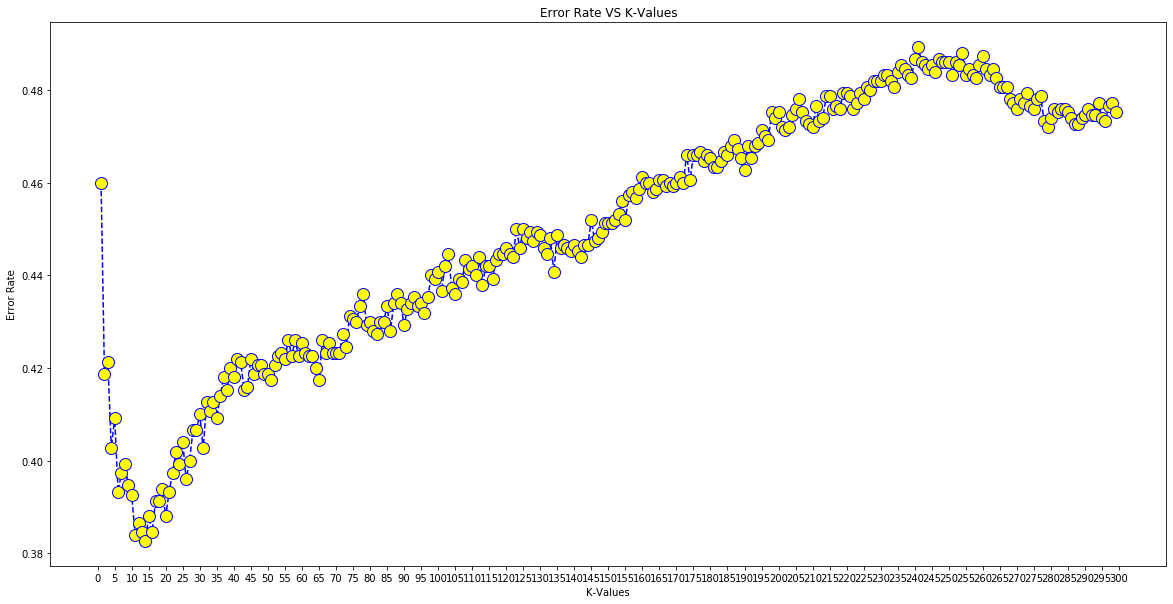

In [69]:
plt.figure(figsize=(20,10))
plt.plot(range(1,300),Error_rate_array,'go--',color='blue',marker='o',markerfacecolor='yellow',markersize=12)

plt.title("Error Rate VS K-Values")
plt.xlabel("K-Values")
plt.ylabel("Error Rate")
plt.xticks(np.arange(0, 301, 5)) 
plt.show()

Text(0, 0.5, 'Error Rate')

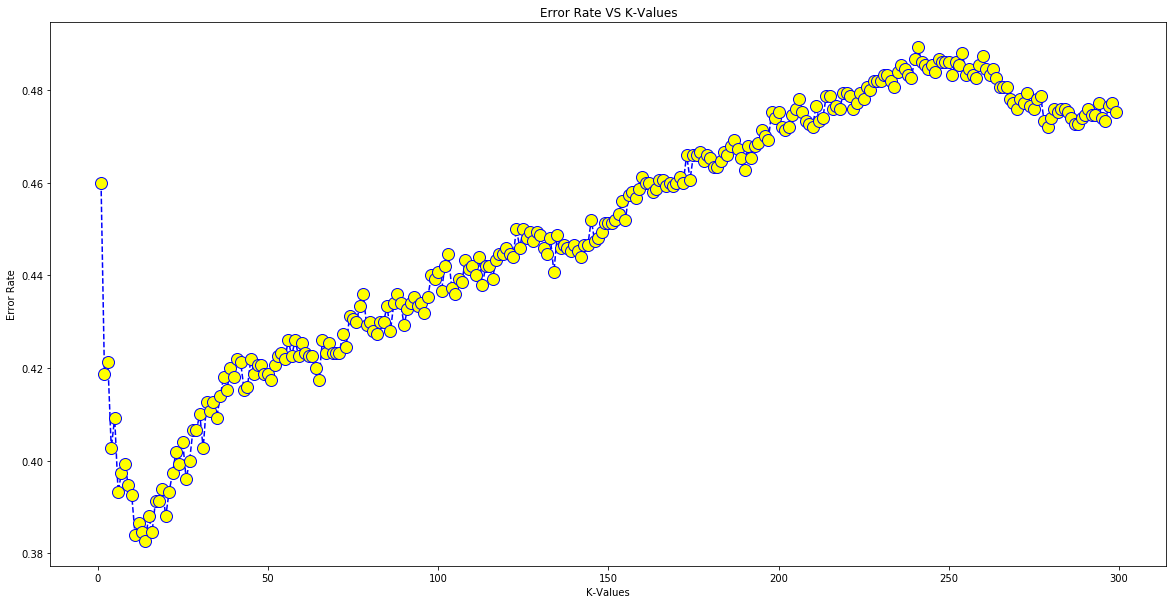

In [66]:
plt.figure(figsize=(20,10))
plt.plot(range(1,300),Error_rate_array,'go--',color='blue',marker='o',markerfacecolor='yellow',markersize=12)

plt.title("Error Rate VS K-Values")
plt.xlabel("K-Values")
plt.ylabel("Error Rate")

In [14]:
#Knn classifer with most appropriate feature selection, mainly depend on n_neighbors which is 15
knn_image_celebA_clf=KNeighborsClassifier( n_neighbors=15,leaf_size=100,metric='minkowski', metric_params=None, n_jobs=-1, p=2, weights='uniform')

In [15]:
#Fitting the classifier on complete dataset with X=98479(images with features) and y=98479 (labels)
knn_image_celebA_clf.fit(X,y)

KNeighborsClassifier(leaf_size=100, n_jobs=-1, n_neighbors=15)

In [40]:
#Predictions on classifier by passing validation data set X_val = 12270 images
predictions_knn_image_celebA_clf=knn_image_celebA_clf.predict(X_val)

In [24]:
#importing scikit learn library for accuracy metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [43]:
#For evaluation of accuracy metrics,we need to pass predicted labels and validation labels y_val (12270)
#for comparison between trained dataset and validation dataset using confusion matrix,classification report and accuracy Score.

print(confusion_matrix(y_val,predictions_knn_image_celebA_clf))
print(classification_report(y_val,predictions_knn_image_celebA_clf))


[[2606  242 1143   16]
 [  28 2614  162   48]
 [ 965  921 2591   30]
 [  80  402  104  318]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      4007
           1       0.63      0.92      0.74      2852
           2       0.65      0.57      0.61      4507
           3       0.77      0.35      0.48       904

    accuracy                           0.66     12270
   macro avg       0.69      0.62      0.63     12270
weighted avg       0.67      0.66      0.65     12270



In [44]:
accuracy_score=accuracy_score(y_val,predictions_knn_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score)

Accuracy is: 0.66


- The accuracy  measurement metrix calculates 0.66 score (overall of 4 categories hair colour) after implementing KNN algorithm on Entire dataset with appropriate hyperparameter "K"=15.

In [20]:
from sklearn.model_selection import cross_val_score
accuracy_score_val = cross_val_score(knn_image_celebA_clf, X[:15000], y[:15000], scoring='accuracy', cv = 100,n_jobs=-1)

In [27]:
print("Accuracy of the classifier (knn_image_celebA_clf): %0.2f (+/- %0.2f)" % (accuracy_score_val.mean(), accuracy_score_val.std()*2))

Accuracy of the classifier (knn_image_celebA_clf): 0.63 (+/- 0.08)


### b).  Random Forest Algorithm

- Random forest consists of a large number of individual decision trees that operate as an ensemble(a group of predictors is called an ensemble).Using multiple learning algorithms to obtain better predictive performance is called Ensemble Learning.

- An ensemble learning algorithm is called an Ensemble method and ensemble of Decision Trees is called a Random Forest.

- Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

- Here we have performed trial and error approach by tweaking only n_estimators with two different values ,following with   max_leaf_nodes=100,n_jobs=-1,max_depth=10,max_features='auto',min_samples_leaf=100.But Accuracy matrix came same in both approaches.  

In [12]:
from sklearn.ensemble import RandomForestClassifier #importing  RandomForest classifier from scikitlearn ensemble algorithm library

- Random Forest (n_estimators = 5000)

In [13]:
#initializing random forest classifier

rnd_image_celebA_clf= RandomForestClassifier( n_estimators =5000,max_leaf_nodes=100,n_jobs=-1,max_depth=10,max_features='auto',min_samples_leaf=100)

In [14]:
#Fitting the classifier on complete dataset with X=98479(images with features) and y=98479 (labels)
rnd_image_celebA_clf.fit(X , y)

RandomForestClassifier(max_depth=10, max_leaf_nodes=100, min_samples_leaf=100,
                       n_estimators=5000, n_jobs=-1)

In [15]:
#Predictions on classifier by passing validation data set X_val = 12270 images
predictions_rnd_image_celebA_clf=rnd_image_celebA_clf.predict(X_val)

In [18]:
#For evaluation of accuracy metrics,we need to pass predicted labels and validation labels y_val (12270)
#for comparison between trained dataset and validation dataset using confusion matrix,classification report and accuracy Score.


print(confusion_matrix(y_val,predictions_rnd_image_celebA_clf))
print(classification_report(y_val,predictions_rnd_image_celebA_clf))


[[3430   92  482    3]
 [  25 2401  390   36]
 [ 966  416 3109   16]
 [  45  380  194  285]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      4007
           1       0.73      0.84      0.78      2852
           2       0.74      0.69      0.72      4507
           3       0.84      0.32      0.46       904

    accuracy                           0.75     12270
   macro avg       0.77      0.68      0.69     12270
weighted avg       0.76      0.75      0.74     12270



In [19]:
accuracy_score_rnd=accuracy_score(y_val,predictions_rnd_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_rnd)

Accuracy is: 0.75


 - The accuracy  measurement metrix calculates 0.75 score (overall of 4 categories hair colour) after implementing Random Forest algorithm on Entire dataset with n_estimators =5000

- Random Forest (n_estimators =10000)

In [20]:
rnd_image_celebA_clf= RandomForestClassifier( n_estimators =10000,max_leaf_nodes=100,n_jobs=-1,max_depth=10,max_features='auto',min_samples_leaf=100)

In [21]:
rnd_image_celebA_clf.fit(X , y)

RandomForestClassifier(max_depth=10, max_leaf_nodes=100, min_samples_leaf=100,
                       n_estimators=10000, n_jobs=-1)

In [22]:
predictions_rnd_image_celebA_clf=rnd_image_celebA_clf.predict(X_val)

In [23]:
print(confusion_matrix(y_val,predictions_rnd_image_celebA_clf))
print(classification_report(y_val,predictions_rnd_image_celebA_clf))
accuracy_score_rnd=accuracy_score(y_val,predictions_rnd_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_rnd)


[[3434   90  480    3]
 [  28 2400  387   37]
 [ 968  416 3106   17]
 [  45  383  192  284]]
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      4007
           1       0.73      0.84      0.78      2852
           2       0.75      0.69      0.72      4507
           3       0.83      0.31      0.46       904

    accuracy                           0.75     12270
   macro avg       0.77      0.68      0.69     12270
weighted avg       0.76      0.75      0.74     12270

Accuracy is: 0.75


 - The accuracy  measurement metrix calculates 0.75 score (overall of 4 categories hair colour) after implementing Random Forest algorithm on Entire dataset with n_estimators =5000

### c). Decision Tree Algorithm

- Decision Trees can perform classification and regression.Classification trees are tree models where the target
  variable can take discrete values.Decision Trees are well suited for fitting complex datasets.They are fundamental components    of Random Forests.They are nonparametric models.They are prone to overfitting.The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
  

 

In [24]:
from sklearn.tree import DecisionTreeClassifier #importing Decision Tree classifier from scikitlearn library

- Decision Tree classifier parameters are simple for first trial with max_depth=10(maximum depth of the tree)

In [25]:
dtree_image_celebA_clf=DecisionTreeClassifier(max_depth=10,random_state=42) #decision tree classifier with parameters

In [26]:
dtree_image_celebA_clf.fit(X,y)  #fitting the model on the selected decision tree classifier

DecisionTreeClassifier(max_depth=10, random_state=42)

In [28]:
#Predictions on classifier by passing validation data set X_val = 12270 images
predictions_dtree_image_celebA_clf=dtree_image_celebA_clf.predict(X_val)

In [29]:
#For evaluation of accuracy metrics,we need to pass predicted labels and validation labels y_val (12270)
#for comparison between trained dataset and validation dataset using confusion matrix,classification report and accuracy Score.

print(confusion_matrix(y_val,predictions_dtree_image_celebA_clf))
print(classification_report(y_val,predictions_dtree_image_celebA_clf))
accuracy_score_dtree=accuracy_score(y_val,predictions_dtree_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_dtree)

[[3211  110  659   27]
 [  46 2280  402  124]
 [ 853  533 3046   75]
 [  62  284  138  420]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      4007
           1       0.71      0.80      0.75      2852
           2       0.72      0.68      0.70      4507
           3       0.65      0.46      0.54       904

    accuracy                           0.73     12270
   macro avg       0.71      0.69      0.69     12270
weighted avg       0.73      0.73      0.73     12270

Accuracy is: 0.73


- Decision Tree classifier parameters are tweaked for second trial with max_depth=100(maximum depth of the tree),min_samples_split=10,min_samples_leaf=10,max_leaf_nodes=20 to see the accuracy of classifier with different specification

In [30]:
dtree_image_celebA_clf=DecisionTreeClassifier(max_depth=100, min_samples_split=10,min_samples_leaf=10,max_leaf_nodes=20,random_state=42)

In [31]:
dtree_image_celebA_clf.fit(X,y)

DecisionTreeClassifier(max_depth=100, max_leaf_nodes=20, min_samples_leaf=10,
                       min_samples_split=10, random_state=42)

In [32]:
predictions_dtree_image_celebA_clf=dtree_image_celebA_clf.predict(X_val)

In [33]:
print(confusion_matrix(y_val,predictions_dtree_image_celebA_clf))
print(classification_report(y_val,predictions_dtree_image_celebA_clf))
accuracy_score_dtree=accuracy_score(y_val,predictions_dtree_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_dtree)

[[3061  161  776    9]
 [  52 2152  547  101]
 [ 988  575 2902   42]
 [  56  432  161  255]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      4007
           1       0.65      0.75      0.70      2852
           2       0.66      0.64      0.65      4507
           3       0.63      0.28      0.39       904

    accuracy                           0.68     12270
   macro avg       0.67      0.61      0.62     12270
weighted avg       0.68      0.68      0.68     12270

Accuracy is: 0.68


- Decision Tree classifier parameters are tweaked for Third trial with max_depth=100(maximum depth of the tree),max_leaf_nodes=10 to see the accuracy of classifier with different specification

In [34]:
dtree_image_celebA_clf=DecisionTreeClassifier(max_depth=100,max_leaf_nodes=10,random_state=42)

In [35]:
dtree_image_celebA_clf.fit(X,y)

DecisionTreeClassifier(max_depth=100, max_leaf_nodes=10, random_state=42)

In [36]:
predictions_dtree_image_celebA_clf=dtree_image_celebA_clf.predict(X_val)

In [37]:
print(confusion_matrix(y_val,predictions_dtree_image_celebA_clf))
print(classification_report(y_val,predictions_dtree_image_celebA_clf))
accuracy_score_dtree=accuracy_score(y_val,predictions_dtree_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_dtree)

[[3017  272  694   24]
 [  33 2211  390  218]
 [ 999  956 2470   82]
 [  35  430  120  319]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      4007
           1       0.57      0.78      0.66      2852
           2       0.67      0.55      0.60      4507
           3       0.50      0.35      0.41       904

    accuracy                           0.65     12270
   macro avg       0.62      0.61      0.60     12270
weighted avg       0.66      0.65      0.65     12270

Accuracy is: 0.65


- First trial -- DecisionTreeClassifier(max_depth=10,random_state=42)-- Accuracy is: 0.73

- Second trial-- DecisionTreeClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=10,max_leaf_nodes=20,random_state=42)
    -- Accuracy is: 0.68
    
- Third trial--DecisionTreeClassifier(max_depth=100, max_leaf_nodes=10, random_state=42)-- Accuracy is: 0.65

### d).  Naive Bayes Algorithm

- It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.It also perform well in multi class prediction.It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

- Limitation of Naive Bayes is the assumption of independent predictors.It is not good in handling unknown features, as you know, it is calculated based on conditional probability and if a condition never appears before, then it is just a very general prediction which won’t be very accurate.

- With CelebA image data set,By applying Naive Baye Algorithm to see how it behaves with image data.It is expected to perferm low in this particular scenario. 
 



- First trial is with  GaussianNB Naive Bayes Model and second trial is with  ComplementNB which is further type of Multinomial Naive Bayes Classifier .It is specifically suitable for imbalanced data set. 



In [38]:
 from sklearn.naive_bayes import GaussianNB #importing GaussianNB classifier from scikitlearn library of Naive Bayes Algorithm

In [39]:
GaussianNB_image_celebA_clf = GaussianNB(var_smoothing=0.000000001)  # GaussianNB classifier with parameters var_smoothing=0.000000001

In [40]:
GaussianNB_image_celebA_clf.fit(X , y)  #fitting the model on the selected  GaussianNB classifier

GaussianNB()

In [43]:
#Predictions on classifier by passing validation data set X_val = 12270 images
predictions_GaussianNB_image_celebA_clf=GaussianNB_image_celebA_clf.predict(X_val)

In [44]:
#For evaluation of accuracy metrics,we need to pass predicted labels and validation labels y_val (12270)
#for comparison between trained dataset and validation dataset using confusion matrix,classification report and accuracy Score.

print(confusion_matrix(y_val,predictions_GaussianNB_image_celebA_clf))
print(classification_report(y_val,predictions_GaussianNB_image_celebA_clf))
accuracy_score_GaussianNB=accuracy_score(y_val,predictions_GaussianNB_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_GaussianNB)

[[2403  556  897  151]
 [  68 1952  223  609]
 [1130  902 2183  292]
 [  77  275   36  516]]
              precision    recall  f1-score   support

           0       0.65      0.60      0.63      4007
           1       0.53      0.68      0.60      2852
           2       0.65      0.48      0.56      4507
           3       0.33      0.57      0.42       904

    accuracy                           0.57     12270
   macro avg       0.54      0.58      0.55     12270
weighted avg       0.60      0.57      0.58     12270

Accuracy is: 0.57


In [45]:
GaussianNB_image_celebA_clf = GaussianNB() #GaussianNB classifier with default parameters 

In [46]:
GaussianNB_image_celebA_clf.fit(X , y) #fitting the model on the selected  GaussianNB classifier

GaussianNB()

In [47]:
#Predictions on classifier by passing validation data set X_val = 12270 images
predictions_GaussianNB_image_celebA_clf=GaussianNB_image_celebA_clf.predict(X_val)

In [48]:
#For evaluation of accuracy metrics,we need to pass predicted labels and validation labels y_val (12270)
#for comparison between trained dataset and validation dataset using confusion matrix,classification report and accuracy Score.

print(confusion_matrix(y_val,predictions_GaussianNB_image_celebA_clf))
print(classification_report(y_val,predictions_GaussianNB_image_celebA_clf))
accuracy_score_GaussianNB=accuracy_score(y_val,predictions_GaussianNB_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_GaussianNB)

[[2403  556  897  151]
 [  68 1952  223  609]
 [1130  902 2183  292]
 [  77  275   36  516]]
              precision    recall  f1-score   support

           0       0.65      0.60      0.63      4007
           1       0.53      0.68      0.60      2852
           2       0.65      0.48      0.56      4507
           3       0.33      0.57      0.42       904

    accuracy                           0.57     12270
   macro avg       0.54      0.58      0.55     12270
weighted avg       0.60      0.57      0.58     12270

Accuracy is: 0.57


- There is no difference in accuracy score of GaussianNB() classifier with var_smoothing value or without it.
- GaussianNB_image_celebA_clf = GaussianNB(var_smoothing=0.000000001) --- Accuracy is: 0.57
- GaussianNB_image_celebA_clf= GaussianNB()---  Accuracy is: 0.57

In [49]:
from sklearn.naive_bayes import ComplementNB #importing ComplementNB classifier from scikitlearn library of Naive Bayes Algorithm

In [50]:
ComplementNB_image_celebA_clf = ComplementNB(alpha=1.0) # ComplementNB classifier with parameters alpha=1.0

In [51]:
ComplementNB_image_celebA_clf.fit(X , y) #fitting the model on the selected ComplementNB classifier

ComplementNB()

In [52]:
#Predictions on classifier by passing validation data set X_val = 12270 images
predictions_ComplementNB_image_celebA_clf=ComplementNB_image_celebA_clf.predict(X_val)

In [53]:
#For evaluation of accuracy metrics,we need to pass predicted labels and validation labels y_val (12270)
#for comparison between trained dataset and validation dataset using confusion matrix,classification report and accuracy Score.

print(confusion_matrix(y_val,predictions_ComplementNB_image_celebA_clf))
print(classification_report(y_val,predictions_ComplementNB_image_celebA_clf))
accuracy_score_ComplementNB=accuracy_score(y_val,predictions_ComplementNB_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_ComplementNB)

[[2792  694  325  196]
 [ 252 2410  183    7]
 [1864 1368 1044  231]
 [  46  795   16   47]]
              precision    recall  f1-score   support

           0       0.56      0.70      0.62      4007
           1       0.46      0.85      0.59      2852
           2       0.67      0.23      0.34      4507
           3       0.10      0.05      0.07       904

    accuracy                           0.51     12270
   macro avg       0.45      0.46      0.41     12270
weighted avg       0.54      0.51      0.47     12270

Accuracy is: 0.51


- ComplementNB_image_celebA_clf = ComplementNB(alpha=1.0) -- Accuracy is: 0.51

### e). Support Vector Machine Algorithm

- (SVM) is a supervised machine learning algorithm.SVMs are commonly used for classification but can also be used for regression and even for outlier detection.

- SVC is the classifier for the Support vector machine.For the parameters for this classifier the main selection is "RBF Kernel" which is Gaussian Radial Basic Function (RBF) is a bell shaped similarity function.It measures how much each instance resembles a particular landmark•

- Selection of two hyperparameters C and gamma with the help of GridSerachcv library and feed most appropriate C and gamma values to the main SVC algorithm for evaluation of SVM algorithm on CelebA dataset

- C is the cost of misclassification as correctly stated by Dima.A large C gives you low bias and high variance. Low bias because you penalize the cost of missclasification a lot.A small C gives you higher bias and lower variance.

- Gamma is the parameter of a Gaussian Kernel (to handle non-linear classification)

In [14]:
from sklearn.svm import SVC #importing SVC classifier from scikitlearn library of SVM Algorithm

In [15]:
#Initializing C and gamma values to gridserach cv

GridSearchCV_hyperparams= {'C':[100,1000,10000],'gamma':[0.001,0.0001,0.00001]}

In [16]:
from sklearn.model_selection import GridSearchCV #importing GridSearchCV classifier from scikitlearn library of SVM Algorithm

In [17]:
# GridSearchCV parameters with initializing all possible patterns with c and gamma
#and decision function shape is one versus one(one vs one is to train a separate classifier for each different pair of labels) 
GridSearchCV_image_celebA_clf=GridSearchCV(SVC(decision_function_shape='ovo'),GridSearchCV_hyperparams,verbose=2,n_jobs=-1)

 - with 5000 input values

In [110]:
GridSearchCV_image_celebA_clf.fit(X[:5000],y[:5000]) # initially selecting 5000 input values

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 26.3min finished


GridSearchCV(estimator=SVC(decision_function_shape='ovo'), n_jobs=-1,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [0.001, 0.0001, 1e-05]},
             verbose=2)

In [111]:
GridSearchCV_image_celebA_clf.best_params_   # best parameters

{'C': 100, 'gamma': 0.0001}

In [112]:
GridSearchCV_image_celebA_clf.best_score_   # best score 

0.7969999999999999

In [113]:
GridSearchCV_image_celebA_clf.best_estimator_   # best estimators

SVC(C=100, decision_function_shape='ovo', gamma=0.0001)

- Best hyperparameters with 5000 input values are C=100 and gamma=0.0001 and decision_function_shape='ovo'

In [74]:
GridSearchCV_hyperparams= {'C':[100,1000,10000],'gamma':[0.001,0.0001,0.00001]}

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
GridSearchCV_image_celebA_clf=GridSearchCV(SVC(decision_function_shape='ovo'),GridSearchCV_hyperparams,verbose=2,n_jobs=-1)

 - with 10,000 input values

In [77]:
GridSearchCV_image_celebA_clf.fit(X[:10000],y[:10000]) #- 10,000 input data values

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 53.9min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 80.9min finished


GridSearchCV(estimator=SVC(decision_function_shape='ovo'), n_jobs=-1,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [0.001, 0.0001, 1e-05]},
             verbose=2)

In [78]:
GridSearchCV_image_celebA_clf.best_params_

{'C': 100, 'gamma': 0.0001}

In [79]:
GridSearchCV_image_celebA_clf.best_score_

0.8174999999999999

In [80]:
GridSearchCV_image_celebA_clf.best_estimator_

SVC(C=100, decision_function_shape='ovo', gamma=0.0001)

In [81]:
predictions_GridSearchCV_image_celebA_clf=GridSearchCV_image_celebA_clf.predict(X_val)

In [82]:
print(confusion_matrix(y_val,predictions_GridSearchCV_image_celebA_clf))
print(classification_report(y_val,predictions_GridSearchCV_image_celebA_clf))
print(accuracy_score(y_val,predictions_GridSearchCV_image_celebA_clf))

[[3571   37  371   28]
 [  30 2469  294   59]
 [ 857  327 3269   54]
 [  70  124   99  611]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      4007
           1       0.83      0.87      0.85      2852
           2       0.81      0.73      0.77      4507
           3       0.81      0.68      0.74       904

    accuracy                           0.81     12270
   macro avg       0.81      0.79      0.80     12270
weighted avg       0.81      0.81      0.81     12270

0.8084759576202118


- Best hyperparameters with 10,000 input values are C=100 and gamma=0.0001 and decision_function_shape='ovo'

 - with 25,000 input values

In [18]:
GridSearchCV_image_celebA_clf.fit(X[:25000],y[:25000]) # 25,000 input data 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 423.1min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 728.5min finished


GridSearchCV(estimator=SVC(decision_function_shape='ovo'), n_jobs=-1,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [0.001, 0.0001, 1e-05]},
             verbose=2)

In [19]:
GridSearchCV_image_celebA_clf.best_params_

{'C': 100, 'gamma': 0.0001}

In [20]:
GridSearchCV_image_celebA_clf.best_score_

0.8356

In [21]:
GridSearchCV_image_celebA_clf.best_estimator_

SVC(C=100, decision_function_shape='ovo', gamma=0.0001)

In [22]:
predictions_GridSearchCV_image_celebA_clf=GridSearchCV_image_celebA_clf.predict(X_val)

In [25]:
print(confusion_matrix(y_val,predictions_GridSearchCV_image_celebA_clf))
print(classification_report(y_val,predictions_GridSearchCV_image_celebA_clf))
print(accuracy_score(y_val,predictions_GridSearchCV_image_celebA_clf))

[[3626   30  318   33]
 [  27 2536  251   38]
 [ 768  279 3409   51]
 [  66  110   73  655]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      4007
           1       0.86      0.89      0.87      2852
           2       0.84      0.76      0.80      4507
           3       0.84      0.72      0.78       904

    accuracy                           0.83     12270
   macro avg       0.84      0.82      0.83     12270
weighted avg       0.83      0.83      0.83     12270

0.8334148329258354


- Best hyperparameters with 25,000 input values are C=100 and gamma=0.0001 and decision_function_shape='ovo'

- Now after applying GridSearchCV on three set of sample data (5000, 10,000 and 25,000) for the search of best parameters for  SVC,finally best hyperparameters are known which are  C=100 and gamma=0.0001 and decision_function_shape='ovo'

- Implementing and Evaluating SVC classifier with selection of RBF kernel following C ,gamma  and decision_function_shape

- 98479 (full input data )
- X (images)
- y(labels)

In [15]:
SVM_image_celebA_clf=SVC(kernel='rbf', gamma=0.0001, C=100,decision_function_shape='ovo',random_state=1,cache_size=2000,class_weight='balanced')

In [16]:
SVM_image_celebA_clf.fit(X, y) #fitting the model with complete CelebA dataset on the selected SVC classifier

SVC(C=100, cache_size=2000, class_weight='balanced',
    decision_function_shape='ovo', gamma=0.0001, random_state=1)

In [17]:
#Predictions on classifier by passing validation data set X_val = 12270 images
predictions_SVM_image_celebA_clf=SVM_image_celebA_clf.predict(X_val)

In [19]:
#For evaluation of accuracy metrics,we need to pass predicted labels and validation labels y_val (12270)
#for comparison between trained dataset and validation dataset using confusion matrix,classification report and accuracy Score.

print(confusion_matrix(y_val,predictions_SVM_image_celebA_clf))
print(classification_report(y_val,predictions_SVM_image_celebA_clf))
accuracy_score_SVM=accuracy_score(y_val,predictions_SVM_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_SVM)

[[3584   27  312   84]
 [  17 2565  181   89]
 [ 597  287 3499  124]
 [  35   50   29  790]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4007
           1       0.88      0.90      0.89      2852
           2       0.87      0.78      0.82      4507
           3       0.73      0.87      0.79       904

    accuracy                           0.85     12270
   macro avg       0.83      0.86      0.84     12270
weighted avg       0.85      0.85      0.85     12270

Accuracy is: 0.85


- SVM_image_celebA_clf provides the best accuracy score so far which is 0.85 

- Precion on colour 0 (Black is 0.85),1 (Blond is 0.88),2(Brown is 0.87) and 3 (Gray is 0.73)

- Recall on colour 0 (Black is 0.89),1 (Blond is 0.90),2(Brown is 0.78) and 3 (Gray is 0.87)

- F1- Score on colour 0 (Black is 0.87),1 (Blond is 0.89),2(Brown is 0.82) and 3 (Gray is 0.79)



In [1]:
data = {"KNeighborsClassifier" :[0.67 ,0.66, 0.65 ,0.66],'RandomForestClassifier':[ 0.76,0.75,0.74,0.75],
         'DecisionTreeClassifier':[0.73 ,0.73 ,0.73 ,0.73],
         'GaussianNBClassifier':[0.60, 0.57 ,0.58,0.57],
         'ComplementNBClassifier':[ 0.54,0.51,0.47 ,0.51],
         'SVMClassifier':[0.85,0.85,0.85,0.85]} 
      
import pandas as pd
df = pd.DataFrame(data,index=['Precision','Recall','F1','Accuracy Score'])
df

,KNeighborsClassifier,RandomForestClassifier,DecisionTreeClassifier,GaussianNBClassifier,ComplementNBClassifier,SVMClassifier
Precision,0.67,0.76,0.73,0.60,0.54,0.85
Recall,0.66,0.75,0.73,0.57,0.51,0.85
F1,0.65,0.74,0.73,0.58,0.47,0.85
Accuracy Score,0.66,0.75,0.73,0.57,0.51,0.85


### Step 3  

- Performance Evalaution of all calssifiers utilized in predicting labels on CelebA dataset.

- One more Classifier is add on in this list named VotingClassifier. 

- A Voting Classifier is a machine learning model that trains on an ensemble(a group of predictors is called an ensemble)of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.A soft voting classifier takes the average of probabilities.Even if each classifier is a weak learner, then the ensemble can still be a strong learner.But we need a sufficient number of weak learners and they need to be sufficiently diverse.

- Excluding SVM_image_celebA_clf due to its high accuracy score =0.85 ,Voting Classifier is comparing with all weak classifiers and Let's evaluate the voting classifier performance among individual ones

In [0]:
#importing  classifiers from scikitlearn library of corresponding Algorithms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [0]:
#All mentioned above most relevant classifiers belong to their individual Algorithms

knn_image_celebA_clf=KNeighborsClassifier( n_neighbors=15,leaf_size=100,metric='minkowski', metric_params=None, n_jobs=-1, p=2, weights='uniform')
rnd_image_celebA_clf= RandomForestClassifier( n_estimators =5000,max_leaf_nodes=100,n_jobs=-1,max_depth=10,max_features='auto',min_samples_leaf=100)
dtree_image_celebA_clf=DecisionTreeClassifier(max_depth=10,random_state=42)
GaussianNB_image_celebA_clf = GaussianNB(var_smoothing=0.000000001)
ComplementNB_image_celebA_clf = ComplementNB(alpha=1.0)

In [0]:
#Initializing voting classifier for comparing with weak classifiers.Voting mode is soft (A soft voting classifier takes the average of probabilities.)
voting_image_celebA_clf= VotingClassifier(estimators=[('knn', knn_image_celebA_clf),('rnd',rnd_image_celebA_clf), ('dtree',dtree_image_celebA_clf),('GaussianNB',GaussianNB_image_celebA_clf),('ComplementNB',ComplementNB_image_celebA_clf)],voting='soft')

In [22]:
#for loop checking each mentioned classifier with fitting on whole dataset (CelebA) ,predict on validation dataset
for best_clf in (knn_image_celebA_clf , rnd_image_celebA_clf , dtree_image_celebA_clf ,GaussianNB_image_celebA_clf,ComplementNB_image_celebA_clf,voting_image_celebA_clf):
    best_clf.fit(X , y)
    predictions= best_clf.predict( X_val)
    print(best_clf.__class__.__name__, accuracy_score(y_val ,predictions))

KNeighborsClassifier 0.6625101874490628
RandomForestClassifier 0.7514262428687857
DecisionTreeClassifier 0.7299918500407498
GaussianNB 0.5748981255093725
ComplementNB 0.5128769356153219
VotingClassifier 0.7075794621026895


- Note:Step 3 code has been taken from week 06 Machine learning ilearn lecture. 

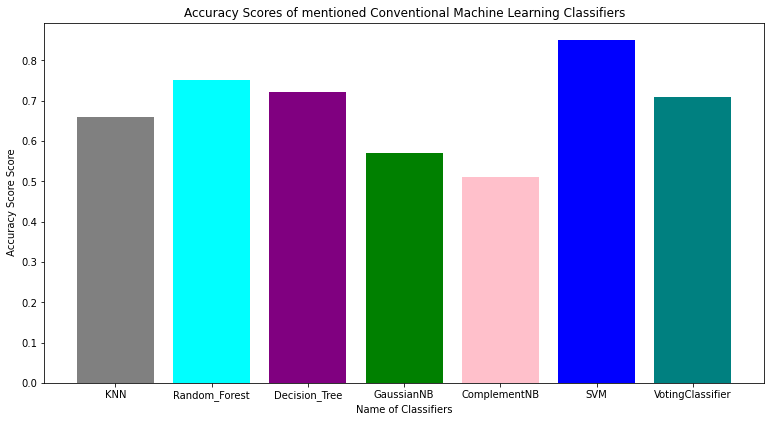

In [31]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
Name_of_Classifiers = ['KNN','Random_Forest','Decision_Tree','GaussianNB','ComplementNB','SVM','VotingClassifier']
Accuracy_Score = [0.66,0.75,0.72,0.57,0.51,0.85,0.71]
ax.bar(Name_of_Classifiers ,Accuracy_Score,color=('gray','aqua','purple','green','pink','blue','teal'))

plt.title("Accuracy Scores of mentioned Conventional Machine Learning Classifiers")
plt.ylabel(" Accuracy Score Score")
plt.xlabel("Name of Classifiers")
plt.show()




- The above bar chart represents the highest accuracy score of SVM classifier which is 0.85 and lowest scores occupied by Naive Bayes two classifiers  (GaussianNB,ComplementNB) 0.57 and 0.51 respectively.The second highest Classifier is Random forest 
  with accuracy 0.75 .In addition Decision tree classifier gained 0.73 approximately and voting classifier holds only 0.70 accuracy Score.To conclude this, it is clearly proved that the best performance belongs to SVM model among all other classifiers due to its highly tunned hyperparameters (selected by GridSearchCV approach) and efficient parameters of svc classifier.
  
#### Reason of Low performance of the following models:
     
- KNN --> KNN is the most simplest classification algorithm in machine learning,in our dataset labels are not present with equal occurences (four colours) ,so the most occurred colour trained more and dominate the other training labels.Thus ,the accuracy score of KNN can highly degraded with high dimension data.

- Naive Bayes algorithms (GaussianNB','ComplementNB)performed really bad,because there are limitations on Naive Bayes algorithms  which are assumption of independent predictors and categorical input variables.Thus it is expected from this classification algorithms to perform below or on average.
  
- Decision trees algorithm accuracy score is 0.73 which is average score and this algorithm has also some limitation with this specific image classification data set.

- Random Forest and Soft Voting are ensemble learning algorithms .Ensemble methods are really good with predictive models.And if bagging and pasting would have been applied on the model ,it can bring more accurate predictions but due to some technical issues those options did not work out with CelebA dataset.But Random Forest algorithm with minimum options brings 0.75 Accuracy score on validataion dataset and voting classifier did not perform well as it was expected to end up with 0.70 accuracy score.
 

In [42]:
X_images_test_public.shape  # images for testing 

(11921, 6912)

In [46]:
predictions_image_test_public=SVM_image_celebA_clf.predict(X_images_test_public) # predictions on test images using SVM classifier performing best with 0.85 accuracy on validation dataset

In [47]:
predictions_image_test_public #predicted labels are ready

array([0, 2, 0, ..., 0, 0, 1], dtype=int64)

In [48]:
print(files_test_public)

['182639.jpg' '182640.jpg' '182642.jpg' ... '202597.jpg' '202598.jpg'
 '202599.jpg']


In [50]:
#dataframe of ID (images) and Prediction (predicted labels on test images)
import pandas as pd
predictions_image_test_public_df=pd.DataFrame({'ID':files_test_public,'Prediction':predictions_image_test_public},columns=['ID','Prediction'])

In [52]:
predictions_image_test_public_df

,ID,Prediction
0,182639.jpg,0
1,182640.jpg,2
2,182642.jpg,0
3,182643.jpg,0
4,182644.jpg,0
...,...,...
11916,202595.jpg,1
11917,202596.jpg,1
11918,202597.jpg,0
11919,202598.jpg,0


In [53]:
predictions_image_test_public_df.to_csv(r'D:\ML PROJECT\MACHINE LEARNING\project\45920842-conv.csv',index=False)

#### The test accuracy score on public test set on kaggle is 0.87022 which is 2 % more efficient on validation dataset ( SVM classifier with 0.85 accuracy score on validation dataset).

- Reference: https://scikit-learn.org/stable/

# Part B: Deep Learning Models

### Step 1

- Implement,explore and Evaluate Deep learning techniques on CelebA dataset, a widely used dataset of celebrity faces.
  Your task is to predict the hair colour of the celebrity, which will be one of black, brown, blond or gray.
  
- For this reference ,there are many models are implemented and evalauted,all the relevant details are given below and name of the aproaches are mentioned here.

 1.Neural network model(multi-layer perceptron) very basic and traditional approach in deep learning neural network.
 
 2.CNN (Convolutional Neural Networks).
        



### Neural network models(Multi-layer Perceptron)

- Multi-layer Perceptron (MLP) is a supervised learning algorithm.It consists of at least three layers(input layer,hidden layer and output layer).Input layer is a set of neurons representing input features,passes to the hidden layer,hidden layer modifies the values of previous layer with a weighted linear summation followed by non linear activation function (identity’, ‘logistic’, ‘tanh’, ‘relu’) then output layer receives the values from the middle(hidden layer) and transforms them in to output .

- Here,Scikit learning Neural Network algorithm is applying with library (MLP) ,2D input data is required as we have already consumed in all conventional algorithms and with trial and error approach,there are changes have been made with hidden layer and obtained the acuuracy score with each trial .

- Hyperparameters:
                    hidden_layer_sizes=(200,200,100)
                    hidden_layer_sizes=(250,150,50)
                    hidden_layer_sizes=(200,150,100)
                    solver ‘adam’ works pretty well on relatively large datasets               
                    activation=relu’, the rectified linear unit function, returns f(x) = max(0, x)
                    
- X.shape,y.shape  ((98479, 6912), (98479,))
- X_val.shape,y_val.shape  ((12270, 6912), (12270,))
- X_images_test_public.shape (11921, 6912)

In [14]:
from sklearn.neural_network import MLPClassifier  #importing MLPClassifier from sklearn neural_network algorithm

In [55]:
#initializing MLP classifier
MLP_image_celebA_clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(200,200,100), random_state=1,activation = 'relu',max_iter=300)

In [56]:
#Fitting the classifier on complete dataset with X=98479(images with features) and y=98479 (labels)

MLP_image_celebA_clf .fit(X, y) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(200, 200, 100), max_iter=300,
              random_state=1)

In [57]:
#Predictions on classifier by passing validation data set X_val = 12270 images
predictions_MLP_image_celebA_clf =MLP_image_celebA_clf .predict(X_val)

In [58]:
#For evaluation of accuracy metrics,we need to pass predicted labels and validation labels y_val (12270)
#for comparison between trained dataset and validation dataset using confusion matrix,classification report and accuracy Score.

print(confusion_matrix(y_val,predictions_MLP_image_celebA_clf))
print(classification_report(y_val,predictions_MLP_image_celebA_clf))
print(accuracy_score(y_val,predictions_MLP_image_celebA_clf))

[[3672    9  295   31]
 [  24 2505  267   56]
 [ 667  206 3585   49]
 [  52  100   52  700]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      4007
           1       0.89      0.88      0.88      2852
           2       0.85      0.80      0.82      4507
           3       0.84      0.77      0.80       904

    accuracy                           0.85     12270
   macro avg       0.85      0.84      0.85     12270
weighted avg       0.85      0.85      0.85     12270

0.8526487367563163


In [59]:
accuracy_score_MLP=accuracy_score(y_val,predictions_MLP_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_MLP)

Accuracy is: 0.85


-    hidden_layer_sizes=(250,150,50)
   

In [15]:
MLP_image_celebA_clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(250,150,50), random_state=1,activation = 'relu',max_iter=300)

In [16]:
MLP_image_celebA_clf .fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(250, 150, 50), max_iter=300,
              random_state=1)

In [17]:
predictions_MLP_image_celebA_clf =MLP_image_celebA_clf .predict(X_val)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
print(confusion_matrix(y_val,predictions_MLP_image_celebA_clf))
print(classification_report(y_val,predictions_MLP_image_celebA_clf))
print(accuracy_score(y_val,predictions_MLP_image_celebA_clf))

[[3614   36  311   46]
 [  10 2613  175   54]
 [ 569  392 3491   55]
 [  44  116   42  702]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4007
           1       0.83      0.92      0.87      2852
           2       0.87      0.77      0.82      4507
           3       0.82      0.78      0.80       904

    accuracy                           0.85     12270
   macro avg       0.84      0.84      0.84     12270
weighted avg       0.85      0.85      0.85     12270

0.8492257538712307


In [20]:
accuracy_score_MLP=accuracy_score(y_val,predictions_MLP_image_celebA_clf)
print("Accuracy is: %.2f" % accuracy_score_MLP)

Accuracy is: 0.85


- hidden_layer_sizes=(200,150,100)

In [0]:
MLP_clf = MLPClassifier(solver='adam', alpha=1, hidden_layer_sizes=(200,150,100), random_state=1,activation = 'relu',max_iter=300)

In [0]:
 MLP_clf.fit(X, y)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 150, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
X_val=X_val.reshape([-1, 48*48*3])

In [0]:
X_val.shape,y_val.shape

((12270, 6912), (12270,))

In [0]:
predictions=clf.predict(X_val)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
accuracy_score(y_val, predictions)

0.856642216788916

- From the above trial and error practice,by using MLP_image_celebA_clf (Neural Network MLP classifier) with three different settings in hidden_layer_sizes=(200,200,100), hidden_layer_sizes=(250,150,50), hidden_layer_sizes=(200,150,100),there is no drastic change in the accuracy score which is approximately =0.85,but if we apply (300,200,100) hidden layer sizer it will not execute even on GPU,i have tried it on Colab.Thus mentioned above hidden_layer_sizes are ideal with the following solver and activation .And this traditional deep learning algorithm provides accuracy equal to the best conventional svm model.

### Step 2

#### CNN (Convolutional Neural Networks)

  - Model A (Scratch CNN basic Model)
  
  - Model B (Using CNN model with image resizing technique)
  
  - Model C (DenseNet201 -10 unfreeze layers)
  
  - Model D (DenseNet201 with data augmentation)
  
  - Model E (VGG19 with -12 unfreeze layers)
  
  - Model F(ResNet50V2 with -3,-5 and -15 unfreeze layers (three models under ResNet50V2 transfer learning)


- In all models,in last output layer(individually) there is 4 with dense layer, which represents the number of classes in this CelebA dataset (4 colours)
- This part of Major project ,i have executed on ColabPro with 25 GB RAM and compute Engine backend(GPU).




In [0]:
#Download required packages (tensorflow and keras) related to CNN deep learning keras algorithm(keras in tensorflow)
import tensorflow as tf
%matplotlib inline

import os
import random
import numpy as np
import keras
import pandas.util.testing as tm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns


from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

In [0]:
#Loading required packages and files related to project again for applying deep learning algorithms

import numpy as np
from os.path import join
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras import layers, models
from google.colab import drive

drive.mount('/content/drive/')

image_size = 48
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = '/content/drive/My Drive/Colab Notebooks/project/'  ## CHANGE TO YOUR OWN DIRECTORY

images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))

images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))

images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))

#preprosessing of input images
images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_public = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0

print(images_train.shape)
print(images_val.shape)
print(images_test_public.shape)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(98479, 48, 48, 3)
(12270, 48, 48, 3)
(11921, 48, 48, 3)


- X variable holds images with features (training set)
- y varaible holds labels of four colours( Black: 37966, Blond: 22855, Brown: 31237 and Gray: 6421)


- X_val variable holds images with features (validation dataset)
- y_val variable holds labels

-  images_test_public (public test set with 11921 images for testing)

- No reshaping is required

In [0]:
X=images_train
y=labels_train

In [0]:
X.shape,y.shape  #For deep learning models no reshaping is required

((98479, 48, 48, 3), (98479,))

In [0]:
print(len(X))
print(len(y))

98479
98479


In [0]:
X_val=images_val
y_val=labels_val

In [0]:
X_val.shape,y_val.shape

((12270, 48, 48, 3), (12270,))

In [0]:
#labels of training  and validation dataset convert array of labeled data(from 0 to nb_classes-1) to one-hot vector 

y = keras.utils.to_categorical(y, 4)
y_val = keras.utils.to_categorical(y_val, 4)

print(X.shape,y.shape)

(98479, 48, 48, 3) (98479, 4)


In [0]:
images_test_public.shape

(11921, 48, 48, 3)

##### Model A 

- Model A is very basic CNN model using keras library with sequential class,there are four Convolutional layers and maxpooling layers,activation with relu,three dropout layers,second last layer is flatten and last output layer with 4 classes(colours) and activation "softmax".

- Reference :

https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb#scrollTo=8OGRcLNwYoZu

In [0]:
# build the network
model = Sequential()
print("Input dimensions: ",X.shape[1:])

# First 2D Convolution Layer with 48 filters, kernel_size(3,3) and convenience parameter which is activation=relu
model.add(Conv2D(48, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second 2D Convolution Layer with 48 filters, kernel_size(3,3) and convenience parameter which is activation=relu
model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))  # Dropout layer (it is a technique used to prevent a model from overfitting)

# Third 2D Convolution Layer with 48 filters, kernel_size(3,3) and convenience parameter which is activation=relu
model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Forth 2D Convolution Layer with 48 filters, kernel_size(3,3) and convenience parameter which is activation=relu
model.add(Conv2D(48, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())  # Flatten layer to flatten the input
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(4))   #output layer with 4 classes
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (48, 48, 3)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 46, 46, 48)        1344      
_________________________________________________________________
activation_7 (Activation)    (None, 46, 46, 48)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 48)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 48)        20784     
_________________________________________________________________
activation_8 (Activation)    (None, 21, 21, 48)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 48)        0         
_________________________________________________________________
dropout_2 (Dropout)    

In [0]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# fitting the model with batch_size=128,epochs=10 and validation dataset
history = model.fit(X, y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(X_val, y_val))


Train on 98479 samples, validate on 12270 samples
Epoch 1/10
98479/98479 [==============================] - 41s 411us/step - loss: 0.5974 - accuracy: 0.7625 - val_loss: 0.3973 - val_accuracy: 0.8508
Epoch 2/10
98479/98479 [==============================] - 38s 385us/step - loss: 0.3780 - accuracy: 0.8639 - val_loss: 0.3218 - val_accuracy: 0.8791
Epoch 3/10
98479/98479 [==============================] - 38s 389us/step - loss: 0.3349 - accuracy: 0.8788 - val_loss: 0.3193 - val_accuracy: 0.8830
Epoch 4/10
98479/98479 [==============================] - 38s 386us/step - loss: 0.3114 - accuracy: 0.8875 - val_loss: 0.2681 - val_accuracy: 0.9018
Epoch 5/10
98479/98479 [==============================] - 37s 374us/step - loss: 0.2924 - accuracy: 0.8938 - val_loss: 0.2825 - val_accuracy: 0.8897
Epoch 6/10
98479/98479 [==============================] - 38s 381us/step - loss: 0.2854 - accuracy: 0.8977 - val_loss: 0.3012 - val_accuracy: 0.8869
Epoch 7/10
98479/98479 [==============================] 

Text(0.5, 0, 'epochs')

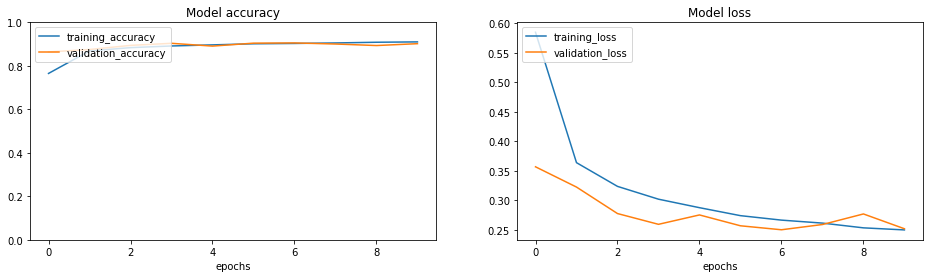

In [24]:
fig = plt.figure(figsize=(16,4))

ax2 = fig.add_subplot(121)
ax2.plot(history.history["accuracy"])
ax2.plot(history.history["val_accuracy"])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
ax2.set_title("Model accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


ax = fig.add_subplot(122)
ax.plot(history.history["loss"])
ax.plot(history.history["val_loss"])
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
ax.set_title("Model loss")
ax.set_xlabel("epochs")


The above line graphs represent Model A accuracy and loss trends between 10 epochs.Model A training and validation accuracy  sustain at 90% but  looking at loss pattern,it can be seen clearly that on epoch 8 validation loss fluctuates and if we increase number of epochs ,there will be pattern at loss trends and there will be chances of overfitting.

- After testing on public test set the final evaluation of Model A is 0.92668 Accuracy score on Kaggle



In [0]:
predictions = model.predict([images_test_public])

In [0]:
predictions

array([[9.8305374e-01, 3.2045296e-04, 1.6308248e-02, 3.1755763e-04],
       [1.0619971e-03, 3.2324946e-01, 6.7294753e-01, 2.7410262e-03],
       [8.3243608e-01, 2.7899952e-03, 1.5312146e-01, 1.1652474e-02],
       ...,
       [9.1536468e-01, 4.5776501e-04, 8.3219908e-02, 9.5767865e-04],
       [9.9771959e-01, 2.7805711e-06, 2.2763303e-03, 1.2500548e-06],
       [1.8007325e-03, 1.8350826e-01, 8.1447744e-01, 2.1348456e-04]],
      dtype=float32)

In [0]:
# predictions on public test images using fitted model
predictions = model.predict_classes([images_test_public])

In [0]:
predictions

array([0, 2, 0, ..., 0, 0, 2])

In [0]:
print(files_test_public)

['182639.jpg' '182640.jpg' '182642.jpg' ... '202597.jpg' '202598.jpg'
 '202599.jpg']


In [0]:
import pandas as pd
predictions_image_test_public_df=pd.DataFrame({'ID':files_test_public,'Prediction':predictions},columns=['ID','Prediction'])

In [0]:
predictions_image_test_public_df

,ID,Prediction
0,182639.jpg,0
1,182640.jpg,2
2,182642.jpg,0
3,182643.jpg,0
4,182644.jpg,0
...,...,...
11916,202595.jpg,1
11917,202596.jpg,1
11918,202597.jpg,0
11919,202598.jpg,0


In [0]:
predictions_image_test_public_df.to_csv('/content/drive/My Drive/handson-ml/project/45920842-deep.csv',index=False)

The result on Public test data on evaluated predictions for Model A is 0.92668





##### Model B

- Model B is advanced version of Model A ,by introducing progressive resizing in convolutional middle layers with value (96x96x3),the input layer is as same as X variable shape and output layer is with 4 classes with softmax option.And rest of layers are same like model A 

- Reference:

https://towardsdatascience.com/boost-your-cnn-image-classifier-performance-with-progressive-resizing-in-keras-a7d96da06e20



In [0]:
# build the network
model = Sequential()
print("Input dimensions: ",X.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3),input_shape=(96, 96, 3), activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),input_shape=(96, 96, 3), activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),input_shape=(96, 96, 3), activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

# model.add(Dropout(0.5))

model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (48, 48, 3)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 46, 46, 32)        896       
_________________________________________________________________
activation_49 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 23, 23, 48)        13872     
_________________________________________________________________
activation_50 (Activation)   (None, 23, 23, 48)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 11, 11, 48)        0         
_________________________________________________________________
dropout_11 (Dropout)   

In [0]:

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_resizing_history = model.fit(X, y,
                    batch_size=128,
                    epochs=10,
                    validation_data=(X_val, y_val))

Train on 98479 samples, validate on 12270 samples
Epoch 1/10
98479/98479 [==============================] - 55s 556us/step - loss: 0.5215 - accuracy: 0.7927 - val_loss: 0.3770 - val_accuracy: 0.8554
Epoch 2/10
98479/98479 [==============================] - 47s 478us/step - loss: 0.3326 - accuracy: 0.8778 - val_loss: 0.3092 - val_accuracy: 0.8821
Epoch 3/10
98479/98479 [==============================] - 48s 488us/step - loss: 0.2974 - accuracy: 0.8897 - val_loss: 0.2841 - val_accuracy: 0.8962
Epoch 4/10
98479/98479 [==============================] - 49s 496us/step - loss: 0.2818 - accuracy: 0.8962 - val_loss: 0.2656 - val_accuracy: 0.8983
Epoch 5/10
98479/98479 [==============================] - 48s 485us/step - loss: 0.2664 - accuracy: 0.9021 - val_loss: 0.2716 - val_accuracy: 0.8954
Epoch 6/10
98479/98479 [==============================] - 47s 480us/step - loss: 0.2561 - accuracy: 0.9053 - val_loss: 0.2546 - val_accuracy: 0.9041
Epoch 7/10
98479/98479 [==============================] 

Text(0.5, 0, 'epochs')

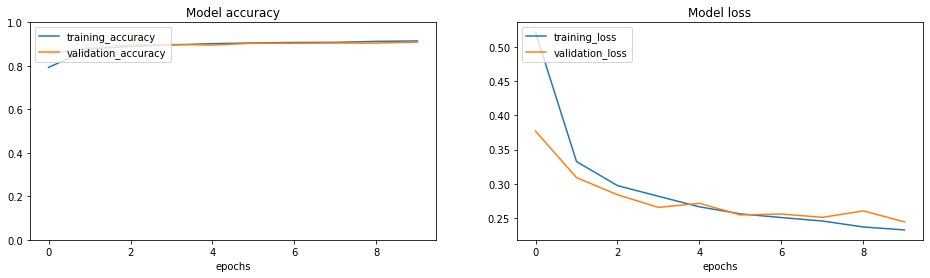

In [0]:
fig = plt.figure(figsize=(16,4))

ax2 = fig.add_subplot(121)
ax2.plot(model_resizing_history.history["accuracy"])
ax2.plot(model_resizing_history.history["val_accuracy"])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
ax2.set_title("Model accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


ax = fig.add_subplot(122)
ax.plot(model_resizing_history.history["loss"])
ax.plot(model_resizing_history.history["val_loss"])
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
ax.set_title("Model loss")
ax.set_xlabel("epochs")

The above line graphs represent Model B accuracy and loss trends between 10 epochs.Model B training and validation accuracy  sustain at 90% but  looking at loss pattern,it can be seen clearly that on epoch 6 validation loss starts increasing and if we increase number of epochs ,there will be increasing patterns at loss trends and there will be chances of overfitting.

- After testing on public test set the final evaluation of Model B is 0.92332 Accuracy score on Kaggle which is less than Model A (Accuracy Score  0.92668).

In [0]:
predictions = model.predict([images_test_public])

In [0]:
predictions = model.predict_classes([images_test_public])

In [0]:
print(files_test_public)

['182639.jpg' '182640.jpg' '182642.jpg' ... '202597.jpg' '202598.jpg'
 '202599.jpg']


In [0]:
import pandas as pd
predictions_image_test_public_df=pd.DataFrame({'ID':files_test_public,'Prediction':predictions},columns=['ID','Prediction'])

In [0]:
predictions_image_test_public_df.to_csv('/content/drive/My Drive/Colab Notebooks/project/45920842-deep.csv',index=False)

The result on Public test data on evaluated predictions for Model B is 0.92332

##### Model C

- DenseNet201 is a convolutional neural network that is 201 layers deep.Trained on more than a million images from the ImageNet database.The pretrained network can classify images into 1000 object categories.

- Input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32.

- Here Utilizing Pretrained DenseNet201,the main reason, is the flexibility available in input shape by default you can pass the input shape not less than 32 and our input image size is (48x48x3) with 10 layers unfreeze (this technique is transfer learning from pretrained models).



In [0]:
#Installation of Pretrained network "DenseNet201" with input_shape (48x48x3)
model_transfer_learning=keras.applications.densenet.DenseNet201(input_shape=(48,48,3), include_top=False, weights='imagenet')
model_transfer_learning.trainable=False

74842112/74836368 [==============================] - 1s 0us/step


In [0]:
# Fine tune
# make a reference to DenseNet201 output layer
output_layer_DenseNet201 = model_transfer_learning.output
#add on flatten layer
last_layer = Flatten()(output_layer_DenseNet201)
#add on Dense layer 
last_layer = Dense(256, activation='relu')(last_layer)
#Final stage of output layer with 4 classes and activation Softmax
output = Dense(4, activation='softmax', name='predictions')(last_layer)
model_DenseNet201 = Model(model_transfer_learning.input, output)


- Reference :https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

In [0]:
# Fine tune
# ensure the last ten layers is trainable/not frozen
for l, layer in enumerate(model_DenseNet201.layers[-10:]):
    layer.trainable = True
    
#Compilation of the DenseNet201

model_DenseNet201.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_DenseNet201.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 24, 24, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 24, 24, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [0]:
#Fitting the model on X (feature images) and y labels for training 
model_DenseNet201_history = model_DenseNet201.fit(X, y,  batch_size=128,  epochs=12, validation_data=(X_val, y_val))

Train on 98479 samples, validate on 12270 samples
Epoch 1/12
98479/98479 [==============================] - 339s 3ms/step - loss: 0.3471 - accuracy: 0.8709 - val_loss: 0.3561 - val_accuracy: 0.8758
Epoch 2/12
98479/98479 [==============================] - 246s 2ms/step - loss: 0.2470 - accuracy: 0.9088 - val_loss: 0.2481 - val_accuracy: 0.9095
Epoch 3/12
98479/98479 [==============================] - 246s 2ms/step - loss: 0.2188 - accuracy: 0.9189 - val_loss: 0.3389 - val_accuracy: 0.8747
Epoch 4/12
98479/98479 [==============================] - 246s 2ms/step - loss: 0.2196 - accuracy: 0.9187 - val_loss: 0.2760 - val_accuracy: 0.9051
Epoch 5/12
98479/98479 [==============================] - 245s 2ms/step - loss: 0.2035 - accuracy: 0.9241 - val_loss: 0.3131 - val_accuracy: 0.8878
Epoch 6/12
98479/98479 [==============================] - 242s 2ms/step - loss: 0.1806 - accuracy: 0.9325 - val_loss: 0.3636 - val_accuracy: 0.8747
Epoch 7/12
98479/98479 [==============================] - 241s

Text(0.5, 0, 'epochs')

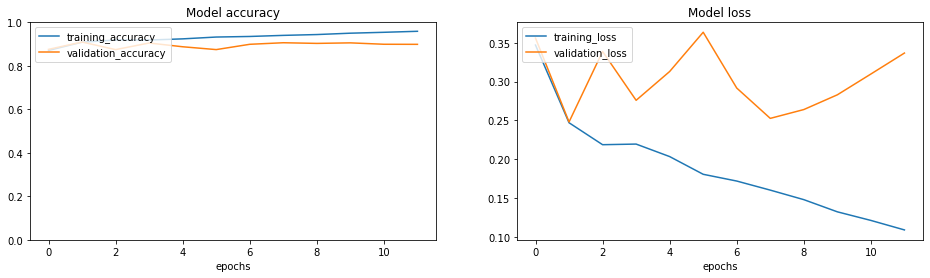

In [0]:
fig = plt.figure(figsize=(16,4))

ax2 = fig.add_subplot(121)
ax2.plot(model_DenseNet201_history.history["accuracy"])
ax2.plot(model_DenseNet201_history.history["val_accuracy"])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
ax2.set_title("Model accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


ax = fig.add_subplot(122)
ax.plot(model_DenseNet201_history.history["loss"])
ax.plot(model_DenseNet201_history.history["val_loss"])
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
ax.set_title("Model loss")
ax.set_xlabel("epochs")



The above line graphs represent Model C accuracy and loss trends between 12 epochs.Model C training accuracy is sustaining at 0.95 approximately but validation accuracy is less than training accuracy which shows the sign of overfitting  and considering Model loss graph there is tremendous fluctuation(between epochs) in validation loss  and training loss is in decreasing pattern(as expected).Thus Model C is not generalizing well ,there is a chance of applying data augmentation and observe results ,so the next model is with the same configuration but with application of data augmentation.




##### Model D
- DenseNet201 with given input and output layers with -10 layers unfreeze .
- Data augmentation is applying to the model,in order to achieve well fitted training model 
- Data augmentation specifications are rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest" (these are very minimal changes to see the model performance)

In [0]:
#installation of ImageDataGenerator class  from  keras.preprocessing.image library
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#Data augmentation configuration
data_augmentation=ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest")

In [0]:
#Fitting data augmentation on variable X
x_train_new=X
x_train_new.shape
data_augmentation.fit(x_train_new)

In [0]:
#Fitting data augmentation on DenseNet201 model with -10 unfreeze layers
batch_size=32
data_augmentation_model_DenseNet201=model_DenseNet201.fit(data_augmentation.flow(x_train_new,y,batch_size),steps_per_epoch=len(x_train_new)/batch_size,epochs=10,validation_data=(X_val, y_val))

Epoch 1/10
3078/3077 [==============================] - 839s 272ms/step - loss: 0.3200 - accuracy: 0.8828 - val_loss: 0.2559 - val_accuracy: 0.9024
Epoch 2/10
3078/3077 [==============================] - 847s 275ms/step - loss: 0.2616 - accuracy: 0.9034 - val_loss: 0.3486 - val_accuracy: 0.9062
Epoch 3/10
3078/3077 [==============================] - 850s 276ms/step - loss: 0.2580 - accuracy: 0.9051 - val_loss: 0.6737 - val_accuracy: 0.8747
Epoch 4/10
3078/3077 [==============================] - 851s 277ms/step - loss: 0.2553 - accuracy: 0.9057 - val_loss: 0.2491 - val_accuracy: 0.9068
Epoch 5/10
3078/3077 [==============================] - 839s 273ms/step - loss: 0.2386 - accuracy: 0.9115 - val_loss: 0.2480 - val_accuracy: 0.9045
Epoch 6/10
3078/3077 [==============================] - 816s 265ms/step - loss: 0.2317 - accuracy: 0.9153 - val_loss: 3.8523 - val_accuracy: 0.8039
Epoch 7/10
3078/3077 [==============================] - 818s 266ms/step - loss: 0.2324 - accuracy: 0.9147 - val_

Text(0.5, 0, 'epochs')

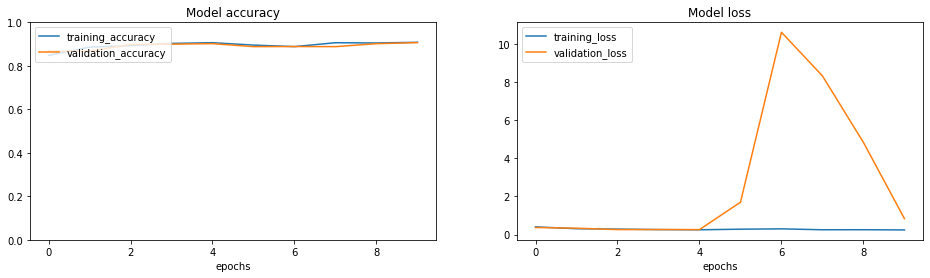

In [49]:
fig = plt.figure(figsize=(16,4))

ax2 = fig.add_subplot(121)
ax2.plot(data_augmentation_model_DenseNet201.history["accuracy"])
ax2.plot(data_augmentation_model_DenseNet201.history["val_accuracy"])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
ax2.set_title("Model accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


ax = fig.add_subplot(122)
ax.plot(data_augmentation_model_DenseNet201.history["loss"])
ax.plot(data_augmentation_model_DenseNet201.history["val_loss"])
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
ax.set_title("Model loss")
ax.set_xlabel("epochs")

The above line graphs represent Model D accuracy and loss trends between 12 epochs.Model D training  and validation accuracy is 
sustaining at 0.95 approximately( which is an improvement from Model C accuracy levels).By looking at Model loss graph, 
validation loss has one exception after epoch 4 and start coming back gradually from epoch 7 which is over all not the good 
sign.The Model accuracy graph is improved version of Model C accuracy graph ,Thus Model D is qualified for testing process on
available public test set .

- After testing on public test set the final evaluation of Model D is 0.92106 Accuracy score on Kaggle which is less than Model A  and Model B

In [0]:
predictions = model_DenseNet201.predict([images_test_public])

In [0]:
import numpy as np
predictions_model_DenseNet201=np.argmax(predictions,axis=1)

In [0]:
import pandas as pd
predictions_image_test_public_df=pd.DataFrame({'ID':files_test_public,'Prediction':predictions_model_DenseNet201},columns=['ID','Prediction'])

In [0]:
predictions_image_test_public_df

,ID,Prediction
0,182639.jpg,0
1,182640.jpg,1
2,182642.jpg,0
3,182643.jpg,0
4,182644.jpg,0
...,...,...
11916,202595.jpg,1
11917,202596.jpg,1
11918,202597.jpg,0
11919,202598.jpg,0


In [0]:
predictions_image_test_public_df.to_csv('/content/drive/My Drive/Colab Notebooks/project/45920842DEEP.csv',index=False)

- After testing on public test set the final evaluation of Model D is 0.92106 Accuracy score on Kaggle which is less than Model A  and Model B




##### Model E

- VGG19 is a variant of VGG model which in short consists of 19 layers (16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer).

- Input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with channels_first data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32


- Here Utilizing Pretrained VGG19,the main reason, is the flexibility available in input shape by default you can pass the input shape not less than 32 and our input image size is (48x48x3) with 12 layers unfreeze (this technique is transfer learning from pretrained models)

In [0]:
#Installation of Pretrained network "VGG19" with input_shape (48x48x3)
vgg_model_transfer_learning = keras.applications.VGG19(input_shape=(48,48,3), include_top=False, weights='imagenet')
vgg_model_transfer_learning.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [0]:
# Fine tune
# make a reference to VGG19 output layer
output_layer_vgg19 = vgg_model_transfer_learning.output
last_layer = Flatten()(output_layer_vgg19)
last_layer = Dense(256, activation='relu')(last_layer)
output_vgg19 = Dense(4, activation='softmax', name='predictions')(last_layer)
model_vgg19 = Model(vgg_model_transfer_learning.input, output_vgg19)

In [0]:
# Fine tune
# ensure the last 12 layers is trainable/not frozen
for l, layer in enumerate(model_vgg19.layers[-12:]):
    layer.trainable = True

model_vgg19.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_vgg19.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [0]:
model_vgg19_history = model_vgg19.fit(X, y,  batch_size=128,  epochs=12, validation_data=(X_val, y_val))

Train on 98479 samples, validate on 12270 samples
Epoch 1/12
98479/98479 [==============================] - 1439s 15ms/step - loss: 1.3109 - accuracy: 0.3813 - val_loss: 1.2730 - val_accuracy: 0.3266
Epoch 2/12
98479/98479 [==============================] - 1418s 14ms/step - loss: 0.6836 - accuracy: 0.7109 - val_loss: 0.3885 - val_accuracy: 0.8592
Epoch 3/12
98479/98479 [==============================] - 1419s 14ms/step - loss: 0.3566 - accuracy: 0.8697 - val_loss: 0.3415 - val_accuracy: 0.8726
Epoch 4/12
98479/98479 [==============================] - 1433s 15ms/step - loss: 0.2966 - accuracy: 0.8941 - val_loss: 0.3050 - val_accuracy: 0.8953
Epoch 5/12
98479/98479 [==============================] - 1431s 15ms/step - loss: 0.2661 - accuracy: 0.9040 - val_loss: 0.2937 - val_accuracy: 0.8934
Epoch 6/12
98479/98479 [==============================] - 1433s 15ms/step - loss: 0.2431 - accuracy: 0.9125 - val_loss: 0.2942 - val_accuracy: 0.8935
Epoch 7/12
98479/98479 [==========================

Text(0.5, 0, 'epochs')

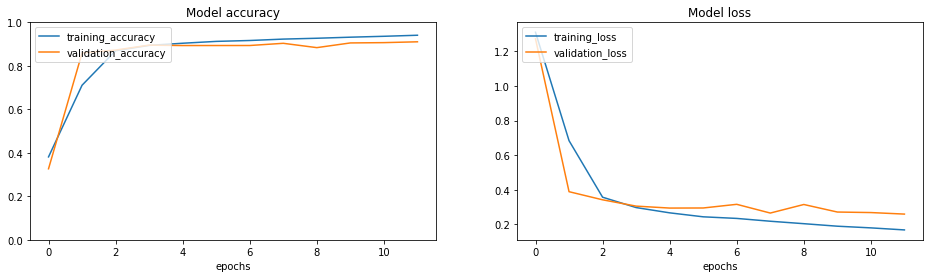

In [0]:
fig = plt.figure(figsize=(16,4))

ax2 = fig.add_subplot(121)
ax2.plot(model_vgg19_history.history["accuracy"])
ax2.plot(model_vgg19_history.history["val_accuracy"])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
ax2.set_title("Model accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


ax = fig.add_subplot(122)
ax.plot(model_vgg19_history.history["loss"])
ax.plot(model_vgg19_history.history["val_loss"])
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
ax.set_title("Model loss")
ax.set_xlabel("epochs")


The above line graphs represent Model E accuracy and loss trends between 12 epochs.Model E training accuracy is sustaining at 0.95 approximately after epoch 3 but still validation accuracy is underlying of it.By looking at Model loss graph,training loss is consistent(going downwards) but validation loss has little curves after 6 epoch which can be negligible.Thus Model E qualifies for testing on public dataset.

- The result on Public test data on evaluated predictions on Model E is 0.92483 accuracy score on Kaggle.


In [0]:
predictions =  model_vgg19.predict([images_test_public])

In [0]:
import numpy as np
predictions_model_vgg19=np.argmax(predictions,axis=1)

In [0]:
import pandas as pd
predictions_image_test_public_df=pd.DataFrame({'ID':files_test_public,'Prediction':predictions_model_vgg19},columns=['ID','Prediction'])

In [0]:
predictions_image_test_public_df

,ID,Prediction
0,182639.jpg,0
1,182640.jpg,2
2,182642.jpg,0
3,182643.jpg,0
4,182644.jpg,0
...,...,...
11916,202595.jpg,1
11917,202596.jpg,1
11918,202597.jpg,0
11919,202598.jpg,0


In [0]:
predictions_image_test_public_df.to_csv('/content/drive/My Drive/Colab Notebooks/project/45920842-deep.csv',index=False)

 - The result on Public test data on evaluated predictions on Model E is 0.92483 accuracy score on Kaggle.

##### Model F

- ResNet50v2 is a variant of ResNet model which has 48 Convolution layers along with 1 MaxPool and 1 Average Pool layer.It is a widely used ResNet model.

- Input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with 'channels_last' data format) or (3, 224, 224) (with 'channels_first' data format). It should have exactly 3 inputs channels, and width and height should be no smaller than 32.

- Here Utilizing Pretrained ResNet50V2,the main reason, is the flexibility available in input shape by default you can pass the input shape not less than 32 and our input image size is (48x48x3) with three set of  layers(-3,-5 and -15) unfreeze (this technique is transfer learning from pretrained models)

In [0]:
#Installation of Pretrained network "ResNet50V2" with input_shape (48x48x3)

ResNet50V2_network = keras.applications.ResNet50V2(input_shape=(48,48,3), include_top=False, weights='imagenet')
ResNet50V2_network.summary()



94674944/94668760 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 26, 26, 64)   0           conv1_conv[0][0]                 
________________________

In [0]:
# Fine tune
# make a reference to ResNet50v2 output layer
out_ResNet50V2 =ResNet50V2_network.output
output_layer = Flatten()(out_ResNet50V2)
output_layer = Dense(256, activation='relu')(output_layer)
ResNet50V2_output = Dense(4, activation='softmax', name='predictions')(output_layer)
model_ResNet50V2 = Model(ResNet50V2_network.input,ResNet50V2_output)

In [0]:
# Fine tune
# make all layers untrainable by freezing weights (except for last three layers)
for l, layer in enumerate(model_ResNet50V2.layers[:-3]):
    layer.trainable = False

In [0]:
model_ResNet50V2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_ResNet50V2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 26, 26, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [0]:
model_ResNet50V2_history = model_ResNet50V2.fit(X, y, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(X_val, y_val))

Train on 98479 samples, validate on 12270 samples
Epoch 1/10
98479/98479 [==============================] - 147s 1ms/step - loss: 0.8344 - accuracy: 0.6547 - val_loss: 1.2483 - val_accuracy: 0.5252
Epoch 2/10
98479/98479 [==============================] - 148s 2ms/step - loss: 0.7022 - accuracy: 0.7028 - val_loss: 1.7826 - val_accuracy: 0.4917
Epoch 3/10
98479/98479 [==============================] - 148s 2ms/step - loss: 0.6459 - accuracy: 0.7299 - val_loss: 1.9641 - val_accuracy: 0.4960
Epoch 4/10
98479/98479 [==============================] - 148s 1ms/step - loss: 0.5939 - accuracy: 0.7562 - val_loss: 2.1355 - val_accuracy: 0.4985
Epoch 5/10
98479/98479 [==============================] - 146s 1ms/step - loss: 0.5494 - accuracy: 0.7751 - val_loss: 1.8449 - val_accuracy: 0.5441
Epoch 6/10
98479/98479 [==============================] - 145s 1ms/step - loss: 0.5105 - accuracy: 0.7934 - val_loss: 2.1687 - val_accuracy: 0.5010
Epoch 7/10
98479/98479 [==============================] - 151s

- By looking at training and validation accuracy on every epoch shows very less accuracy and it is better to try with more layer unfreeze.

In [0]:
# make all layers untrainable by freezing weights (except for last 5 layers)

for l, layer in enumerate(model_ResNet50V2.layers[:-5]):
    layer.trainable = False

In [0]:
model_ResNet50V2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_ResNet50V2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 26, 26, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [0]:
model_ResNet50V2_history = model_ResNet50V2.fit(X, y, 
                         batch_size=128, 
                         epochs=10, 
                         validation_data=(X_val, y_val))

Train on 98479 samples, validate on 12270 samples
Epoch 1/10
98479/98479 [==============================] - 152s 2ms/step - loss: 0.3738 - accuracy: 0.8537 - val_loss: 2.9185 - val_accuracy: 0.4803
Epoch 2/10
98479/98479 [==============================] - 148s 1ms/step - loss: 0.3531 - accuracy: 0.8623 - val_loss: 3.2018 - val_accuracy: 0.4871
Epoch 3/10
98479/98479 [==============================] - 150s 2ms/step - loss: 0.3359 - accuracy: 0.8703 - val_loss: 3.1351 - val_accuracy: 0.4989
Epoch 4/10
98479/98479 [==============================] - 146s 1ms/step - loss: 0.3169 - accuracy: 0.8772 - val_loss: 3.8918 - val_accuracy: 0.4665
Epoch 5/10
98479/98479 [==============================] - 149s 2ms/step - loss: 0.3107 - accuracy: 0.8802 - val_loss: 3.9172 - val_accuracy: 0.4738
Epoch 6/10
98479/98479 [==============================] - 151s 2ms/step - loss: 0.3033 - accuracy: 0.8837 - val_loss: 5.3258 - val_accuracy: 0.4402
Epoch 7/10
98479/98479 [==============================] - 152s

- By looking at training and validation accuracy on every epoch shows very less accuracy and it is better to try with more layer unfreeze.

In [0]:
# make all layers untrainable by freezing weights (except for last 15 layers)
for l, layer in enumerate(model_ResNet50V2.layers[:-15]):
    layer.trainable = False

In [0]:
model_ResNet50V2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_ResNet50V2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 24, 24, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 26, 26, 64)   0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [0]:
model_ResNet50V2_history = model_ResNet50V2.fit(X, y, 
                         batch_size=128, 
                         epochs=12, 
                         validation_data=(X_val, y_val))

Train on 98479 samples, validate on 12270 samples
Epoch 1/12
98479/98479 [==============================] - 243s 2ms/step - loss: 0.7162 - accuracy: 0.7090 - val_loss: 1.2105 - val_accuracy: 0.5503
Epoch 2/12
98479/98479 [==============================] - 242s 2ms/step - loss: 0.5503 - accuracy: 0.7787 - val_loss: 1.6204 - val_accuracy: 0.4603
Epoch 3/12
98479/98479 [==============================] - 243s 2ms/step - loss: 0.4624 - accuracy: 0.8151 - val_loss: 1.2996 - val_accuracy: 0.5466
Epoch 4/12
98479/98479 [==============================] - 242s 2ms/step - loss: 0.3847 - accuracy: 0.8483 - val_loss: 2.0153 - val_accuracy: 0.4848
Epoch 5/12
98479/98479 [==============================] - 247s 3ms/step - loss: 0.3208 - accuracy: 0.8756 - val_loss: 1.3684 - val_accuracy: 0.5654
Epoch 6/12
98479/98479 [==============================] - 242s 2ms/step - loss: 0.2649 - accuracy: 0.8973 - val_loss: 1.7972 - val_accuracy: 0.5282
Epoch 7/12
98479/98479 [==============================] - 245s

Text(0.5, 0, 'epochs')

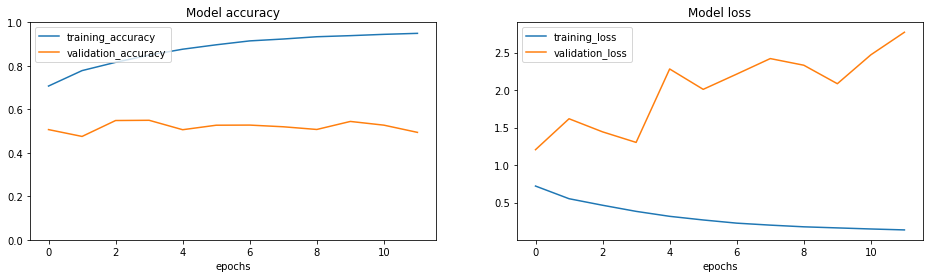

In [17]:
fig = plt.figure(figsize=(16,4))

ax2 = fig.add_subplot(121)
ax2.plot(model_ResNet50V2_history.history["accuracy"])
ax2.plot(model_ResNet50V2_history.history["val_accuracy"])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
ax2.set_title("Model accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


ax = fig.add_subplot(122)
ax.plot(model_ResNet50V2_history.history["loss"])
ax.plot(model_ResNet50V2_history.history["val_loss"])
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
ax.set_title("Model loss")
ax.set_xlabel("epochs")

The above line graphs represent Model accuracy and loss of Model F.In this Model F, 15  layers are unfreeze but still validation accuracy is less than training accuracy and it is definate case of overfitting .Validation loss is also in increasing trend with multiple fluctuations.This Model F is not qualifying for testing but just to verify the observations,this Model F is executed on public test set and has brought less test accuracy which is 0.54903 on kaggle.

- The result on Public test images on evaluated predictions on Model F holds 0.54903 accuracy score on Kaggle.

In [0]:
predictions = model_ResNet50V2.predict([images_test_public])

In [0]:
predictions

array([[9.9943346e-01, 8.6084917e-09, 5.6657731e-04, 4.1656875e-08],
       [4.3964034e-01, 6.2726694e-03, 5.5379987e-01, 2.8709573e-04],
       [9.9932480e-01, 5.8420926e-07, 2.1327243e-04, 4.6141591e-04],
       ...,
       [9.9995112e-01, 3.0451008e-07, 4.8457739e-05, 5.1707381e-08],
       [9.9985397e-01, 6.2397184e-08, 1.4182358e-04, 4.0472537e-06],
       [1.5938507e-02, 8.0172357e-04, 9.8301297e-01, 2.4675400e-04]],
      dtype=float32)

In [0]:
import numpy as np
pre=np.argmax(predictions,axis=1)

In [0]:
pre

array([0, 2, 0, ..., 0, 0, 2])

In [0]:
import pandas as pd
predictions_image_test_public_df=pd.DataFrame({'ID':files_test_public,'Prediction':pre},columns=['ID','Prediction'])

In [0]:
predictions_image_test_public_df

,ID,Prediction
0,182639.jpg,0
1,182640.jpg,2
2,182642.jpg,0
3,182643.jpg,0
4,182644.jpg,0
...,...,...
11916,202595.jpg,2
11917,202596.jpg,2
11918,202597.jpg,0
11919,202598.jpg,0


In [0]:
predictions_image_test_public_df.to_csv('/content/drive/My Drive/Colab Notebooks/project/45920842-DEEP.csv',index=False)


- The result on Public test images on evaluated predictions on Model F holds 0.54903 accuracy score on Kaggle.

In [5]:

Name_of_Models = ['Model A','Model B','Model D','Model E','Model F']
Accuracy_Score = [0.9266,0.9233,0.92106,0.9248,0.5490]

import pandas as pd
Table_df=pd.DataFrame({'Model Names':Name_of_Models,'Accuracy Score on Public dataset on Kaggle':Accuracy_Score},columns=['Model Names','Accuracy Score on Public dataset on Kaggle'])
Table_df



,Model Names,Accuracy Score on Public dataset on Kaggle
0,Model A,0.92660
1,Model B,0.92330
2,Model D,0.92106
3,Model E,0.92480
4,Model F,0.54900


- Note: Model C (DenseNet201 -10 unfreeze layers) is an overfitted model and not qualified for Kaggle accuracy Score test on Public test dataset.

### Permormance Evaluation on Deep learning Models( tested on Public dataset top 4)

- Model A is simple basic Convolutional Newural Network  using keras library with sequential class,there are four Convolutional layers and maxpooling layers,activation with relu,three dropout layers,second last layer is flatten and last output layer with 4 classes(colours) and activation "softmax".This Model A is medium Sized network with  77,268 weights and biases(the parameters).
  Model A is compiled on optimizer "adam",metrics is accuracy and loss is categorical_crossentropy.These all are the configuration of Model A,which is trained on X and y (training data set 98479 images with labels) and validation data set with (12270 images with labels) and evaluating on 10 epochs with batch size 128 and after training and evaluation,prediction on Model A is occured with Public test set with (11921) images and predicted labels are uploaded on kaggle for checking accuracy score and it is 0.92660(which is highest Score among all models)Which is ranked 22 position on kaggle Public leaderboard.
  
##### Model A Accuracy score and it is 0.92660(which is highest Score among all models)Which is ranked 22 position on kaggle Public leaderboard.

- Model B is an advanced version of Model A,by introducing progressive resizing in convolutional middle layers with value (96x96x3),the input layer is as same as "X" variable shape and output layer is with 4 classes with softmax option.And rest of layers are same like model A.This Model B is medium Sized network with 381,044 weights and biases(the parameters).
  Model B is compiled on optimizer "adam",metrics is accuracy and loss is categorical_crossentropy.These all are the configuration of Model B,which is trained on X and y (training data set 98479 images with labels) and validation data set with (12270 images with labels) and evaluating on 10 epochs with batch size 128 and after training and evaluation,prediction on Model B is occured with Public test set with (11921) images and predicted labels are uploaded on kaggle for checking accuracy score and it is 0.92330 on kaggle Public test dataset (which is less than Model A accuracy score on Kaggle (0.92660).
  
##### Model B Accuracy score is 0.92330 on kaggle Public test dataset (which is less than Model A accuracy score on Kaggle (0.92660).     
  
- Model D (which is based on transfer learning pretrained on ImageNet model, retrieved from Keras applications repository) named  DenseNet201,originally it is a convolutional neural network that is 201 layers deep.Trained on more than a million images from the ImageNet database with 18,814,788 parameters.This DenseNet201 network has ability to accept user input image size which should be in (height x widtg x RGB) format and dimensions should not less than 32 otherwise input shape has to be (224,224,3)in which this DenseNet201 is trained with 1000 classes.Here in Model D,DenseNet201 with given input and output layers with -10 unfreeze open layers.Data augmentation is applying to the model,in order to achieve well fitted training model.Data augmentation specifications are rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest" (these are very minimal changes to see the model performance).


##### After testing on public test dataset the final evaluation of Model D is 0.92106 Accuracy score on Kaggle which is less than Model A  and Model B
  
- Model E(which is based on transfer learning pretrained on ImageNet model, retrieved from Keras applications repository) named VGG19 network consists of 19 layers(16 convolution layers, 3 Fully connected layer, 5 MaxPool layers and 1 SoftMax layer) with 20,024,384 parameters.This vgg19 network has ability to accept user input image size which should be in (height x widtg x RGB) format and dimensions should not less than 32 otherwise input shape has to be (224,224,3)in which this VGG19 is trained with 1000 classes.Model E is trained with 12 layers unfreeze and fitting on Celeb A dataset with (X images shape is 48 x48x3),evaluates with 12 epochs with batch size 128.

##### Model E predictions on Public test set shows Accuracy score 0.92480 on Kaggle which is second highest among all models. 






- Note:

By applying Transfer learning on Pretrained models from Keras Application (Model C,D,E and F) are not delivered more accuracy score than Model A(which is basic CNN Model)and the reason behind this, those models are made up of different input image size configuration(though pretrained models have flexibility of feeding customized image size, not less than 32) but in depth of those models there are many layers have been used which are trained on ImageNet datasets) and new feeded CelebA dataset with images(X) and labels(y) are new to the pretrained models.Those models are performing really well in training but in validation dataset ,it is not fitted/trained well and Model is not generalizing well due to the overfitting of data.Pretrained models donot help well,when target task is more sensitive(pretrained models should have trained on a similar dataset as we are exploring CelebA for predictions of hair colours).





### Step 3

- Performance Evaluation of deep learning Models with Private test set 

In [16]:
#Load all the important varaibles again
#Training set
X=images_train
y=labels_train

In [17]:
X.shape,y.shape

((98479, 48, 48, 3), (98479,))

In [18]:
print(len(X))
print(len(y))

98479
98479


In [19]:
#Validation set
X_val=images_val
y_val=labels_val

In [20]:
X_val.shape,y_val.shape

((12270, 48, 48, 3), (12270,))

In [0]:
#labels of training  and validation dataset convert array of labeled data(from 0 to nb_classes-1) to one-hot vector 

y = keras.utils.to_categorical(y, 4)
y_val = keras.utils.to_categorical(y_val, 4)

print(X.shape,y.shape)

(98479, 48, 48, 3) (98479, 4)


In [22]:
#assigning variables to private test set images for predictions and after getting predicted labels,match them with given images(files_test_private )

images_test_private = np.load(join(dataset_directory, 'test_private_images.npy'))
files_test_private = np.load(join(dataset_directory, 'test_private_files.npy'))

In [23]:
images_test_private = images_test_private.reshape([-1, image_size, image_size, 3]) / 255.0 # normalizing private test images

In [24]:
images_test_private.shape

(13143, 48, 48, 3)

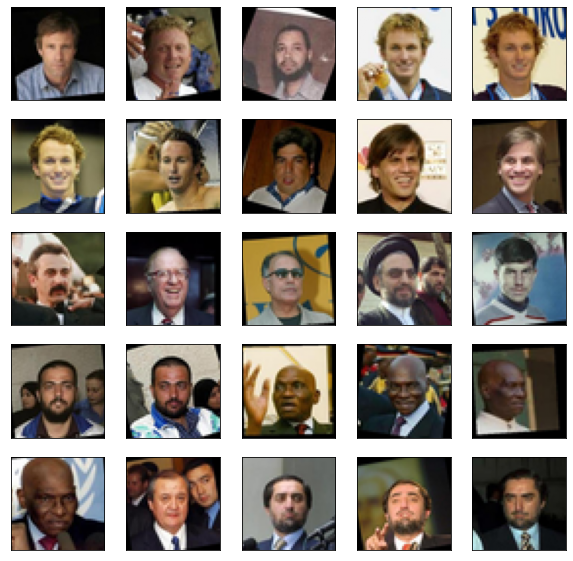

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_test_private[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
#     plt.xlabel(hair_colours[labels_train[i]])
plt.show()

- By looking at display images of private test dataset,it is evident that some images are not clear,misclassified and other colours of hairs are also present except (Black, Blond,Brown,Gray) as it was not expected(by looking at training and validation images) and there are many bald images too which can create noise in data.Thus for reducing or controlling distortion  of images data augmentation would be preferable technique

##### Model B

-  Model B is advanced version of Model A ,by introducing progressive resizing in convolutional middle layers with value (96x96x3),the input layer is as same as "X" variable shape and output layer is with 4 classes with softmax option.And rest of layers are same like model A 

- Reason behind selection of Model B to try on private test data set is that ,It has progressive resizing approach and it has third last high accuracy score on public test set (0.92330)

In [0]:
#build the network
model = Sequential()
print("Input dimensions: ",X.shape[1:])

# First2D Convolution Layer with 48 filters, kernel_size(3,3) and convenience parameter which is activation=relu
model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second 2D Convolution Layer with 48 filters, kernel_size(3,3) and input_shape is passed by (96x96x3)resizing and convenience parameter which is activation=relu
model.add(Conv2D(48, (3, 3),input_shape=(96, 96, 3), activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

# Third 2D Convolution Layer with 48 filters, kernel_size(3,3) and input_shape is passed by (96x96x3)resizing and convenience parameter which is activation=relu
model.add(Conv2D(64, (3, 3),input_shape=(96, 96, 3), activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Forth2D Convolution Layer with 48 filters, kernel_size(3,3) and convenience parameter which is activation=relu
model.add(Conv2D(128, (3, 3),input_shape=(96, 96, 3), activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))


model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (48, 48, 3)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 48)        13872     
_________________________________________________________________
activation_2 (Activation)    (None, 23, 23, 48)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)    

In [0]:
#Compiling and fitting model on training and validation dataset
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model_resizing_history = model.fit(X, y, batch_size=128, epochs=12, validation_data=(X_val, y_val))

Train on 98479 samples, validate on 12270 samples
Epoch 1/12
98479/98479 [==============================] - 15s 155us/step - loss: 0.5181 - accuracy: 0.7957 - val_loss: 0.3569 - val_accuracy: 0.8637
Epoch 2/12
98479/98479 [==============================] - 9s 90us/step - loss: 0.3400 - accuracy: 0.8762 - val_loss: 0.3245 - val_accuracy: 0.8783
Epoch 3/12
98479/98479 [==============================] - 9s 90us/step - loss: 0.3053 - accuracy: 0.8876 - val_loss: 0.2718 - val_accuracy: 0.8963
Epoch 4/12
98479/98479 [==============================] - 9s 88us/step - loss: 0.2836 - accuracy: 0.8957 - val_loss: 0.2748 - val_accuracy: 0.8990
Epoch 5/12
98479/98479 [==============================] - 9s 88us/step - loss: 0.2680 - accuracy: 0.9009 - val_loss: 0.2531 - val_accuracy: 0.9026
Epoch 6/12
98479/98479 [==============================] - 9s 88us/step - loss: 0.2608 - accuracy: 0.9043 - val_loss: 0.2415 - val_accuracy: 0.9086
Epoch 7/12
98479/98479 [==============================] - 9s 88us/

Text(0.5, 0, 'epochs')

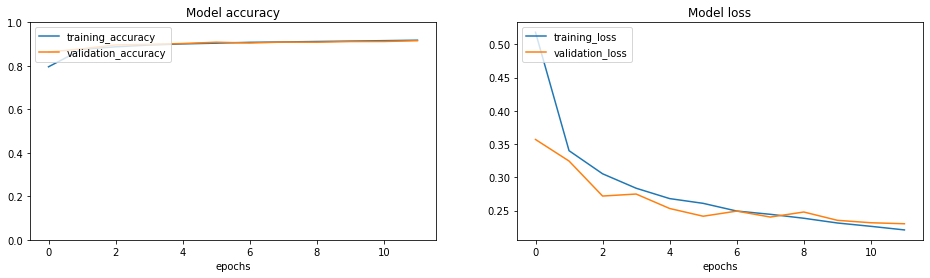

In [0]:
fig = plt.figure(figsize=(16,4))

ax2 = fig.add_subplot(121)
ax2.plot(model_resizing_history.history["accuracy"])
ax2.plot(model_resizing_history.history["val_accuracy"])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
ax2.set_title("Model accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


ax = fig.add_subplot(122)
ax.plot(model_resizing_history.history["loss"])
ax.plot(model_resizing_history.history["val_loss"])
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
ax.set_title("Model loss")
ax.set_xlabel("epochs")

- The above line graphs represent Model B accuracy and loss trends between 12 epochs.Model B training and validation accuracy  sustain at 90% but  looking at loss pattern,it can be seen clearly that on epoch 8 validation loss starts crossing training loss line and if we increase number of epochs ,there will be increasing patterns at loss trends and there will be chances of overfitting.

- There are only two chances to Evaluate the model on private dataset on kaggle ,so i am going to save this Model B predictions and try other models to see the results and if i will get the chance then i will upload private test set predictions on Kaggle to to find out how Model B is performing.

In [0]:
predictions = model.predict_classes([images_test_private])

In [0]:
predictions

array([2, 3, 2, ..., 0, 3, 0])

In [0]:
print(files_test_private)

['Aaron_Eckhart_0001.jpg' 'Aaron_Guiel_0001.jpg'
 'Aaron_Patterson_0001.jpg' ... 'Zumrati_Juma_0001.jpg'
 'Zurab_Tsereteli_0001.jpg' 'Zydrunas_Ilgauskas_0001.jpg']


In [0]:
import pandas as pd
predictions_image_test_private_df=pd.DataFrame({'ID':files_test_private,'Prediction':predictions},columns=['ID','Prediction'])

In [0]:
predictions_image_test_private_df.to_csv('/content/drive/My Drive/Colab Notebooks/project/45920842-test-private.csv',index=False)

##### Model D

- DenseNet201 with given input and output layers with -10 layers unfreeze .
- Data augmentation is applying to the model,in order to achieve well fitted training model 
- Data augmentation specifications are rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest" (these are very minimal changes to see the model performance)

- Model D is the second choice to try out on private dataset because it has data augmentation features and on public test dataset produces a good accuracy score on Kaggle which is (0.92106)

In [0]:
model_transfer_learning=keras.applications.densenet.DenseNet201(input_shape=(48,48,3), include_top=False, weights='imagenet')
model_transfer_learning.trainable=False

74842112/74836368 [==============================] - 1s 0us/step


In [0]:
output_layer_DenseNet201 = model_transfer_learning.output
last_layer = Flatten()(output_layer_DenseNet201)
last_layer = Dense(256, activation='relu')(last_layer)
output = Dense(4, activation='softmax', name='predictions')(last_layer)
model_DenseNet201 = Model(model_transfer_learning.input, output)

In [0]:
# ensure the last ten layers is trainable/not frozen
for l, layer in enumerate(model_DenseNet201.layers[-10:]):
    layer.trainable = True

model_DenseNet201.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model_DenseNet201.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 48, 48, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 54, 54, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 24, 24, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 24, 24, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [0]:

from keras.preprocessing.image import ImageDataGenerator

In [0]:
data_augmentation=ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest")

In [0]:
x_train_new=X
x_train_new.shape
data_augmentation.fit(x_train_new)

In [22]:
batch_size=32
data_augmentation_model_DenseNet201=model_DenseNet201.fit(data_augmentation.flow(x_train_new,y,batch_size),steps_per_epoch=len(x_train_new)/batch_size,epochs=10,validation_data=(X_val, y_val))

Epoch 1/10
3078/3077 [==============================] - 853s 277ms/step - loss: 0.3975 - accuracy: 0.8542 - val_loss: 0.4181 - val_accuracy: 0.8260
Epoch 2/10
3078/3077 [==============================] - 772s 251ms/step - loss: 0.2990 - accuracy: 0.8894 - val_loss: 0.3120 - val_accuracy: 0.8879
Epoch 3/10
3078/3077 [==============================] - 771s 250ms/step - loss: 0.3047 - accuracy: 0.8875 - val_loss: 0.2927 - val_accuracy: 0.8898
Epoch 4/10
3078/3077 [==============================] - 767s 249ms/step - loss: 0.2776 - accuracy: 0.8978 - val_loss: 0.3087 - val_accuracy: 0.8836
Epoch 5/10
3078/3077 [==============================] - 777s 252ms/step - loss: 0.2609 - accuracy: 0.9033 - val_loss: 0.2878 - val_accuracy: 0.8933
Epoch 6/10
3078/3077 [==============================] - 777s 253ms/step - loss: 0.2678 - accuracy: 0.9019 - val_loss: 0.2420 - val_accuracy: 0.9096
Epoch 7/10
3078/3077 [==============================] - 783s 255ms/step - loss: 0.2499 - accuracy: 0.9071 - val_

Text(0.5, 0, 'epochs')

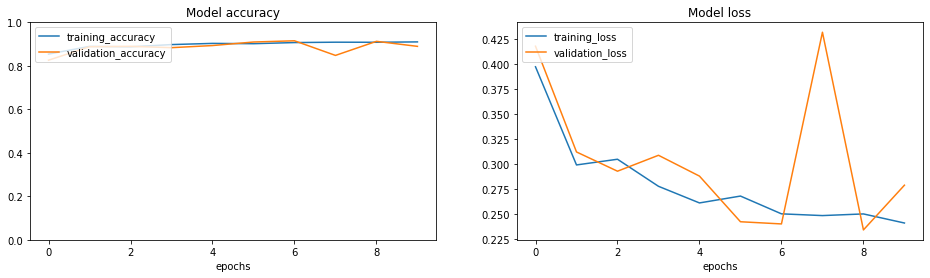

In [23]:
fig = plt.figure(figsize=(16,4))

ax2 = fig.add_subplot(121)
ax2.plot(data_augmentation_model_DenseNet201.history["accuracy"])
ax2.plot(data_augmentation_model_DenseNet201.history["val_accuracy"])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
ax2.set_title("Model accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


ax = fig.add_subplot(122)
ax.plot(data_augmentation_model_DenseNet201.history["loss"])
ax.plot(data_augmentation_model_DenseNet201.history["val_loss"])
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
ax.set_title("Model loss")
ax.set_xlabel("epochs")


- The above line graphs represent Model D accuracy and loss trends between 10 epochs.Model D training  and validation accuracy is sustaining at 0.90+ approximately(with the exception of on validation accuracy on epoch 7).By looking at Model loss graph, 
  validation loss has one exception(sharp spike) after epoch 6 and start coming back sharply on epoch 8 which is over all, not a good sign.The Model loss graph is improved version of Model D (public dataset)loss graph ,due to the one change in this model,is the value of rotation range is 15,instead of 10(like previously).
  
- There is only one exceptional reading on epoch 7 in both readings(accuracy and loss Model)  
  
  
- Thus Model D is qualified for testing process on available private test set .

- After testing on private test set the final evaluation of Model D is 0.58852 Accuracy score on Kaggle .

- After testing on public test set the final evaluation of Model D is 0.92106 Accuracy score on Kaggle .

- There is huge difference between the(Public and Private test dataset) accuracy scores of Same model (Model D)

In [0]:
predictions = model_DenseNet201.predict([images_test_private])

In [0]:
import numpy as np
predictions_model_DenseNet201=np.argmax(predictions,axis=1)

In [39]:
print(files_test_private)

['Aaron_Eckhart_0001.jpg' 'Aaron_Guiel_0001.jpg'
 'Aaron_Patterson_0001.jpg' ... 'Zumrati_Juma_0001.jpg'
 'Zurab_Tsereteli_0001.jpg' 'Zydrunas_Ilgauskas_0001.jpg']


In [0]:
import pandas as pd
predictions_image_test_private_df=pd.DataFrame({'ID':files_test_private,'Prediction':predictions_model_DenseNet201},columns=['ID','Prediction'])

In [0]:
predictions_image_test_private_df.to_csv('/content/drive/My Drive/Colab Notebooks/project/45920842-test-private.csv',index=False)

- After testing on private test set the final evaluation of Model D is 0.58852 Accuracy score on Kaggle .

##### Improved Version of Model B (by applying data augmentation)	

- At this point ,only one chance is left to try on kaggle with Best selected model on private test set.
- Therefore I am selecting Model B(progrssive resizing) and applying data augmentation technique on this model to enhance its properties to train well on training and validation dataset and perform better on private test set too.

-  Model B is advanced version of Model A ,by introducing progressive resizing in convolutional middle layers with value (96x96x3),the input layer is as same as "X" variable shape and output layer is with 4 classes with softmax option.And rest of layers are same like model A 

- With add-on technique which is Data augmentation is applying to the model,in order to achieve well fitted training model 
- Data augmentation specifications are rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest" (these are very minimal changes to see the model performance)

- After testing on public test set the final evaluation of Model B is 0.92332 Accuracy score on Kaggle .

In [42]:
# build the network
model = Sequential()
print("Input dimensions: ",X.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(48, (3, 3),input_shape=(96, 96, 3), activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3),input_shape=(96, 96, 3), activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3),input_shape=(96, 96, 3), activation='relu', padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))


model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (48, 48, 3)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 48)        13872     
_________________________________________________________________
activation_2 (Activation)    (None, 23, 23, 48)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)    

In [0]:
data_augmentation=ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest")

In [0]:
data_augmentation.fit(X)

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [48]:
batch_size=32
data_augmentation_model=model.fit(data_augmentation.flow(X,y,batch_size),steps_per_epoch=len(X)/batch_size,epochs=10,validation_data=(X_val, y_val))

Epoch 1/10
3078/3077 [==============================] - 70s 23ms/step - loss: 0.5120 - accuracy: 0.8042 - val_loss: 0.3851 - val_accuracy: 0.8528
Epoch 2/10
3078/3077 [==============================] - 69s 22ms/step - loss: 0.3698 - accuracy: 0.8637 - val_loss: 0.3373 - val_accuracy: 0.8729
Epoch 3/10
3078/3077 [==============================] - 69s 22ms/step - loss: 0.3426 - accuracy: 0.8749 - val_loss: 0.2986 - val_accuracy: 0.8871
Epoch 4/10
3078/3077 [==============================] - 69s 22ms/step - loss: 0.3265 - accuracy: 0.8827 - val_loss: 0.2652 - val_accuracy: 0.9010
Epoch 5/10
3078/3077 [==============================] - 70s 23ms/step - loss: 0.3174 - accuracy: 0.8836 - val_loss: 0.3102 - val_accuracy: 0.8821
Epoch 6/10
3078/3077 [==============================] - 69s 23ms/step - loss: 0.3093 - accuracy: 0.8873 - val_loss: 0.2875 - val_accuracy: 0.8905
Epoch 7/10
3078/3077 [==============================] - 69s 22ms/step - loss: 0.3036 - accuracy: 0.8901 - val_loss: 0.2701 -

Text(0.5, 0, 'epochs')

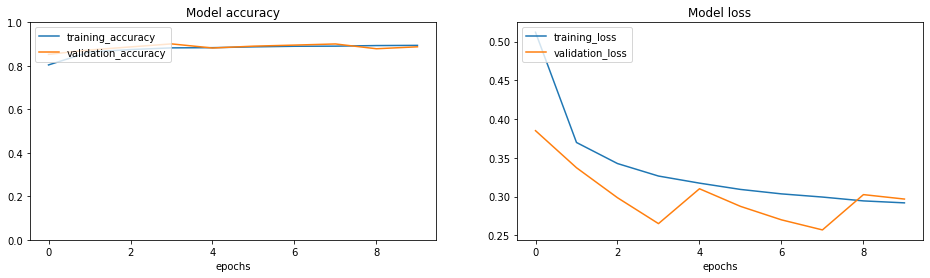

In [49]:
fig = plt.figure(figsize=(16,4))

ax2 = fig.add_subplot(121)
ax2.plot(data_augmentation_model.history["accuracy"])
ax2.plot(data_augmentation_model.history["val_accuracy"])
plt.legend(['training_accuracy', 'validation_accuracy'], loc='upper left')
ax2.set_title("Model accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


ax = fig.add_subplot(122)
ax.plot(data_augmentation_model.history["loss"])
ax.plot(data_augmentation_model.history["val_loss"])
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
ax.set_title("Model loss")
ax.set_xlabel("epochs")

- The above line graphs represent Model B accuracy and loss trends between 10 epochs.Model B training and validation accuracy  sustain at 90% but  looking at loss pattern of Model B,it can be seen clearly that,there are extreme fluctuations in validation loss pattern but it is below the training loss.With this, it is confirmend that there must be something in Model B which is not generalizing well on training and validation dataset.

- But Model B accuracy graph looks well ,training and validation accuracy overlap each other on 0.90+ accuracy.So this Model B with little tweak of data augmentation techniques ready to test on private dataset. (second and last chance on kaggle with private dataset).


In [0]:
predictions = model.predict_classes([images_test_private])

In [51]:
print(files_test_private)

['Aaron_Eckhart_0001.jpg' 'Aaron_Guiel_0001.jpg'
 'Aaron_Patterson_0001.jpg' ... 'Zumrati_Juma_0001.jpg'
 'Zurab_Tsereteli_0001.jpg' 'Zydrunas_Ilgauskas_0001.jpg']


In [0]:
import pandas as pd
predictions_image_test_private_df=pd.DataFrame({'ID':files_test_private,'Prediction':predictions},columns=['ID','Prediction'])

In [0]:
predictions_image_test_private_df.to_csv('/content/drive/My Drive/Colab Notebooks/project/45920842-test-private.csv',index=False)

- After testing on Private test dataset, the final evaluation of Model B is 0.58829 Accuracy score on Kaggle,which is less than Model D .

In [9]:

Name_of_Models = ['Model B','Model D','Improved Version of Model B']
Accuracy_Score = ['None',0.58852,0.58829]

import pandas as pd
Table_df=pd.DataFrame({'Model Names':Name_of_Models,'Accuracy Score on Private test dataset on Kaggle':Accuracy_Score},columns=['Model Names','Accuracy Score on Private test dataset on Kaggle'])
Table_df




,Model Names,Accuracy Score on Private test dataset on Kaggle
0,Model B,None
1,Model D,0.58852
2,Improved Version of Model B,0.58829


- Note: Model B Accuracy Score did not evaluated on Kaggle 

Model D configured with following specification (DenseNet201 with given input and output layers with -10 layers unfreeze).Data augmentation is applying to the model,in order to achieve well fitted training model.Data augmentation specifications are rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest" (these are very minimal changes to see the model performance)

##### Model D is the second choice to try out on private dataset because it has data augmentation features and on public test dataset produces a good accuracy score on Kaggle which is (0.92106), but after testing on private test dataset the final evaluation of Model D is 0.58852 Accuracy score on Kaggle .


-Improved Version of Model B (by applying data augmentation) is advanced version of Model A ,by introducing progressive resizing in convolutional middle layers with value (96x96x3),the input layer is as same as "X" variable shape and output layer is with 4 classes with softmax option.And rest of layers are same like model A 
With add-on technique which is Data augmentation is applying to the model,in order to achieve well fitted training model 
Data augmentation specifications are rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest" (these are very minimal changes to see the model performance)

##### After testing on public test set the final evaluation of Model B is 0.92332 Accuracy score on Kaggle but after testing on private test dataset the final evaluation of Model D is 0.58829 Accuracy score on Kaggle .


### Step 4

### Discussion on Best Model Performance and Implementation on Public test dataset


- In Conventional Machine learning Models ,the best classification approach is SVM Algorithm.

- First by applying GridSearchCV approach,on three set of sample data (5000, 10,000 and 25,000) for the search of best hyperparameters for SVC,finally best hyperparameters are known which are C=100 and gamma=0.0001 and decision_function_shape='ovo'.Then Implementing and Evaluating SVC classifier with selection of RBF kernel following C ,gamma and decision_function_shape on 98479 (full input data )X (images) and y(labels)
- SVM_image_celebA_clf provides the best accuracy score is 0.85

- Precion on colour 0 (Black is 0.85),1 (Blond is 0.88),2(Brown is 0.87) and 3 (Gray is 0.73)

- Recall on colour 0 (Black is 0.89),1 (Blond is 0.90),2(Brown is 0.78) and 3 (Gray is 0.87)

- F1- Score on colour 0 (Black is 0.87),1 (Blond is 0.89),2(Brown is 0.82) and 3 (Gray is 0.79)


##### The test accuracy score on public test set on kaggle is 0.87022 which is 2 % more efficient on validation dataset ( SVM classifier with 0.85 accuracy score on validation dataset with 5 submissions).

- In deep learning Models, Model A is simple basic Convolutional Newural Network  using keras library with sequential class,there are four Convolutional layers and maxpooling layers,activation with relu,three dropout layers,second last layer is flatten and last output layer with 4 classes(colours) and activation "softmax".This Model A is medium Sized network with  77,268 weights and biases(the parameters).
  Model A is compiled on optimizer "adam",metrics is accuracy and loss is categorical_crossentropy.These all are the configuration of Model A,which is trained on X and y (training data set 98479 images with labels) and validation data set with (12270 images with labels) and evaluating on 10 epochs with batch size 128 and after training and evaluation,prediction on Model A is occured with Public test set with (11921) images and predicted labels are uploaded on kaggle for checking accuracy score and it is 0.92660(which is highest Score among all models)Which is ranked 22 position on kaggle Public leaderboard.
  
##### Model A Accuracy score is 0.92660(which is highest Score among all models implemented in this project )and it is ranked 22 position on kaggle Public leaderboard.(with 6 number of submissions).The top performing  system having 0.93935 accuracy and majority class baseline having 0.90 + accuracy scores recorded on Kaggle public test dataset  on inclass CelebA: Hair Colour Prediction Competition






- Deep learning Model A has performed 5.64% better on the public test dataset than Machine learning SVM model

### Discussion on Best Model Performance and Implementation on Private test dataset

Model D configured with following specification (DenseNet201 with given input and output layers with -10 layers unfreeze)fine tuning.Data augmentation is applying to the model,in order to achieve well fitted training model.Data augmentation specifications are rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=(0.9,1.1), horizontal_flip=True,fill_mode="nearest" (these are very minimal changes to see the model performance).

#####  Model D is the second choice to try out on private dataset because it has data augmentation features and on public test dataset produces a good accuracy score on Kaggle which is (0.92106), but after testing on private test dataset the final evaluation of Model D is 0.58852 Accuracy score on Kaggle .

- There is drastic change in performance accuracy Score of Model D with Public test dataset and Private test dataset.

- The reason of low performance of Model D on Private test dataset can be, unexpected images are introduced at testing level rather than on training level,Model D is not trained enough for recognition of noisy data.

- For Model D improvement(better accuracy score) ,there is requirement to work on Test error = irreducible error + bias + variance+ distribution shift + val overfitting.This test error can be rectify by resolving overfitting,distribution shift and rebalanced dataset(as it is mentioned labels are in unequal number of entries Black: 37966, Blond: 22855, Brown: 31237 and Gray: 6421 ).There are troubleshooting techniques to resolve test error and those are: Add more training data (if possible!), Add normalization (e.g., batch norm, layer norm), Add data augmentation,Increase regularization (e.g., dropout, L2, weight decay), Error analysis, Choose a different (closer to state-of-the-art) model architecture,Tune hyperparameters(GridSearchCV,RandomSearch) etc.

Model D performance accuracy can be imporved by applying these techniques one by one on the model and keep observing the test accuracy on each stage,So dont end up with over transformed or overfitted the model.




### References:

1.https://ilearn.mq.edu.au/course/view.php?id=38842

2.https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb#scrollTo=8OGRcLNwYoZu

3.https://www.geeksforgeeks.org/

4.https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33 


5.https://towardsdatascience.com/boost-your-cnn-image-classifier-performance-with-progressive-resizing-in-keras-a7d96da06e20

6.https://keras.io/api/applications/

7.https://scikit-learn.org/stable/

8.https://stackoverflow.com/questions/

9.https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
